In [1]:
%matplotlib inline
from context import spew
from scipy.optimize import curve_fit, minimize
import numpy as np
from shapely.geometry import Point
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
import scipy.ndimage
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rc
from mpl_toolkits.mplot3d import axes3d
from matplotlib import colors as mcolors
from matplotlib.collections import PolyCollection
import pandas as pd
import scipy.stats as stats

plt.style.use('ggplot')


rc('font', **{'family': 'serif', 'serif': ['Palatino']})
rc('text', usetex=True)



In [2]:
param = "plume_height"
label = "H"
units = "km"
trial = 10
vals = np.linspace(10000, 40000, 21)

vals = [int(val) for val in vals]

def disp_func(col):
    return col / 1000

eruptions = dict()
print(vals)

[10000, 11500, 13000, 14500, 16000, 17500, 19000, 20500, 22000, 23500, 25000, 26500, 28000, 29500, 31000, 32500, 34000, 35500, 37000, 38500, 40000]


c:\users\nmostert\envs\spew\lib\site-packages\numpy\core\_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
c:\users\nmostert\envs\spew\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
c:\users\nmostert\envs\spew\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
c:\users\nmostert\envs\spew\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


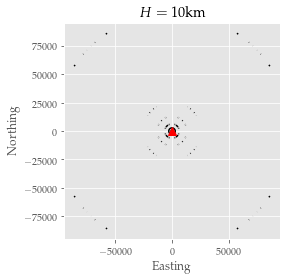

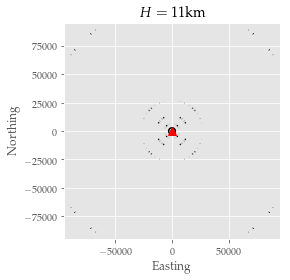

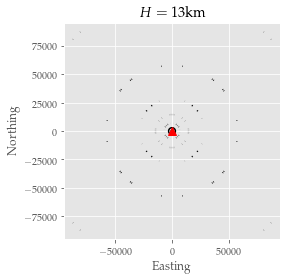

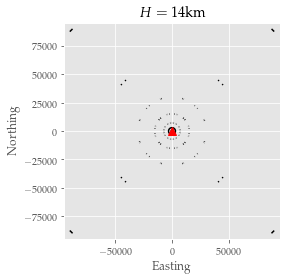

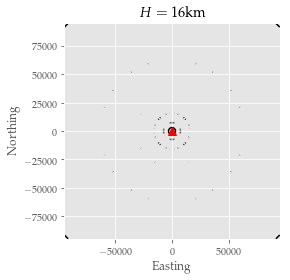

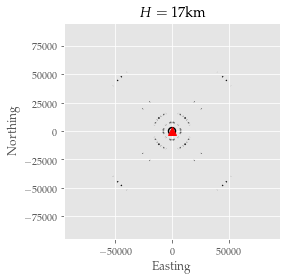

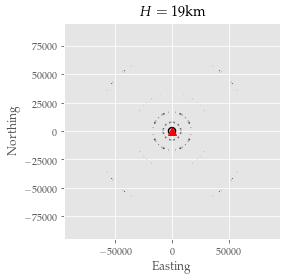

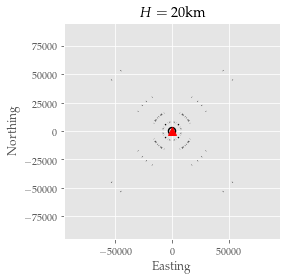

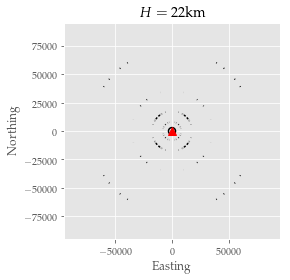

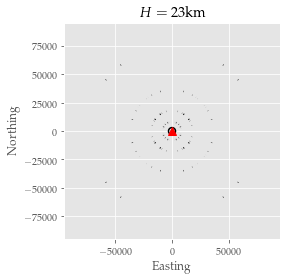

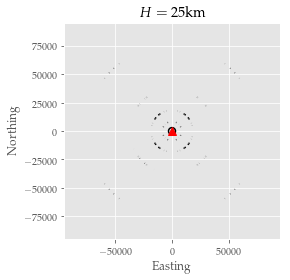

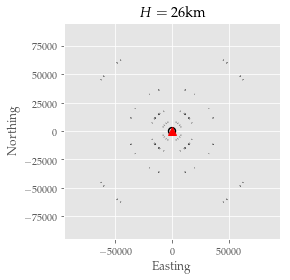

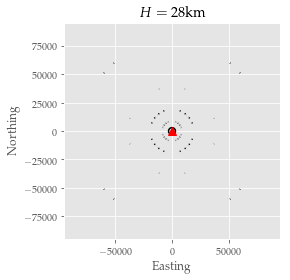

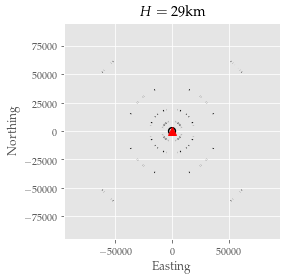

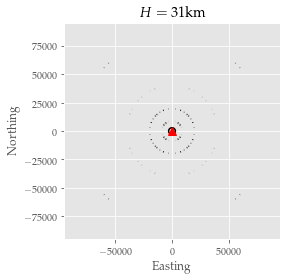

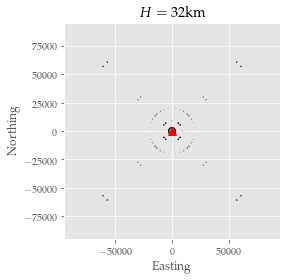

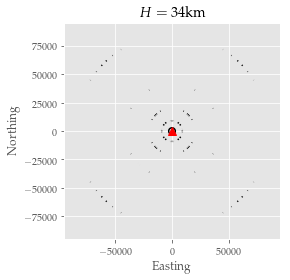

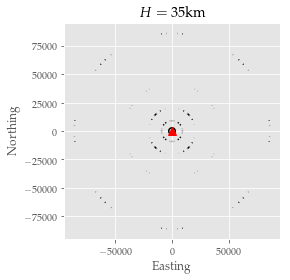

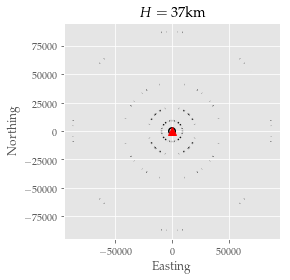

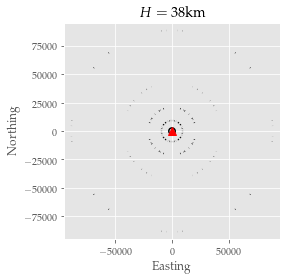

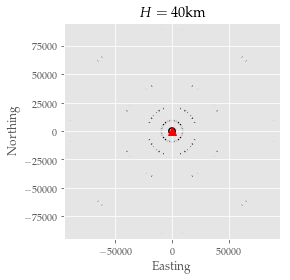

In [4]:
for v in vals:
    filename = '../../data/%s_trial_%d/%s_trial_%d.txt' % (
        param, trial, param, v)
    savename = '../../data/%s_trial_%d/%s_trial_%d.png' % (
        param, trial, param, v)
    eruptions[v] = spew.core.eruption.Eruption(data=filename, vent=Point(0, 0), test=False)
    eruptions[v].plot_contour(title="$H = %d$km"%disp_func(v), cbar_label="Mass/Area", background=None)
phis = eruptions[vals[0]].phi_labels
rows = int(len(phis) / 2)

In [14]:
centroids = eruptions[vals[0]].phi_centroids
print(centroids)

[-4.285715, -3.857145, -3.4285750000000004, -3.0, -2.5714249999999996, -2.142855, -1.7142849999999998, -1.2857150000000002, -0.8571435000000001, -0.4285715, 0.0, 0.4285715, 0.8571435000000001, 1.2857150000000002, 1.7142849999999998, 2.142855, 2.5714249999999996, 3.0, 3.4285750000000004, 3.857145, 4.285715]


In [24]:
display(eruptions[10000].df)

Easting  Northing  Elevation  MassArea  [-4.5,-4.07143)  \
0      -100000   -100000          1  0.029753              0.0   
1       -99000   -100000          1  0.030380              0.0   
2       -98000   -100000          1  0.031018              0.0   
3       -97000   -100000          1  0.031668              0.0   
4       -96000   -100000          1  0.032330              0.0   
5       -95000   -100000          1  0.033004              0.0   
6       -94000   -100000          1  0.033689              0.0   
7       -93000   -100000          1  0.034387              0.0   
8       -92000   -100000          1  0.035097              0.0   
9       -91000   -100000          1  0.035819              0.0   
10      -90000   -100000          1  0.036553              0.0   
11      -89000   -100000          1  0.037300              0.0   
12      -88000   -100000          1  0.038059              0.0   
13      -87000   -100000          1  0.038831              0.0   
14      -86000   -100000          1  0.039615              0.0   
15      -85000   -100000          1  0.040412              0.0   
16      -84000   -100000          1  0.041221              0.0   
17      -83000   -100000          1  0.042043              0.0   
18      -82000   -100000          1  0.042877              0.0   
19      -81000   -100000          1  0.043724              0.0   
20      -80000   -100000          1  0.044584              0.0   
21      -79000   -100000          1  0.045456              0.0   
22      -78000   -100000          1  0.046340              0.0   
23      -77000   -100000          1  0.047236              0.0   
24      -76000   -100000          1  0.048145              0.0   
25      -75000   -100000          1  0.049065              0.0   
26      -74000   -100000          1  0.049998              0.0   
27      -73000   -100000          1  0.050943              0.0   
28      -72000   -100000          1  0.051899              0.0   
29      -71000   -100000          1  0.052866              0.0   
...        ...       ...        ...       ...              ...   
40371    71000    100000          1  0.052985              0.0   
40372    72000    100000          1  0.052015              0.0   
40373    73000    100000          1  0.051057              0.0   
40374    74000    100000          1  0.050111              0.0   
40375    75000    100000          1  0.049176              0.0   
40376    76000    100000          1  0.048254              0.0   
40377    77000    100000          1  0.047343              0.0   
40378    78000    100000          1  0.046445              0.0   
40379    79000    100000          1  0.045559              0.0   
40380    80000    100000          1  0.044685              0.0   
40381    81000    100000          1  0.043824              0.0   
40382    82000    100000          1  0.042975              0.0   
40383    83000    100000          1  0.042139              0.0   
40384    84000    100000          1  0.041316              0.0   
40385    85000    100000          1  0.040505              0.0   
40386    86000    100000          1  0.039706              0.0   
40387    87000    100000          1  0.038920              0.0   
40388    88000    100000          1  0.038147              0.0   
40389    89000    100000          1  0.037386              0.0   
40390    90000    100000          1  0.036637              0.0   
40391    91000    100000          1  0.035901              0.0   
40392    92000    100000          1  0.035178              0.0   
40393    93000    100000          1  0.034466              0.0   
40394    94000    100000          1  0.033767              0.0   
40395    95000    100000          1  0.033080              0.0   
40396    96000    100000          1  0.032405              0.0   
40397    97000    100000          1  0.031741              0.0   
40398    98000    100000          1  0.031090              0.0   
40399    99000    100000          1  0.030450  

c:\users\nmostert\envs\spew\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
c:\users\nmostert\envs\spew\lib\site-packages\scipy\optimize\optimize.py:663: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
c:\users\nmostert\envs\spew\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
c:\users\nmostert\envs\spew\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
c:\users\nmostert\envs\spew\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


_______Phi:[-4.5,-4.07143) __ H:10000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_gk_params:[ 0.99954924 -0.11191802  0.99993974]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


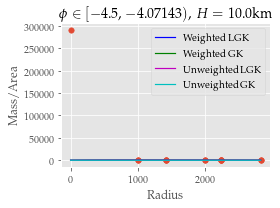

_______Phi:[-4.5,-4.07143) __ H:11500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_gk_params:[ 0.9996039  -0.11188074  0.99994794]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


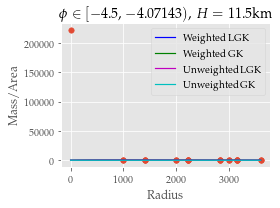

_______Phi:[-4.5,-4.07143) __ H:13000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_gk_params:[ 0.99987362 -0.03794901  0.99998352]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


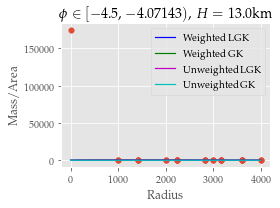

_______Phi:[-4.5,-4.07143) __ H:14500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_gk_params:[ 0.99987957 -0.03792372  0.99998439]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


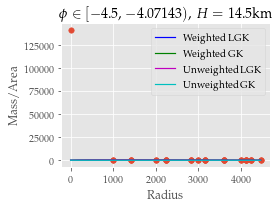

_______Phi:[-4.5,-4.07143) __ H:16000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 0.99996332 -0.00144921  0.99999531]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


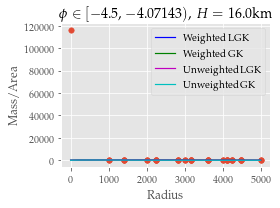

_______Phi:[-4.5,-4.07143) __ H:17500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 0.99996435 -0.00141686  0.99999545]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


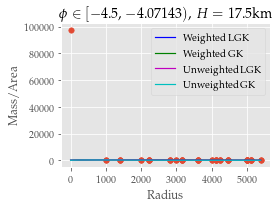

_______Phi:[-4.5,-4.07143) __ H:19000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.00000226 -0.001393    1.00000039]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


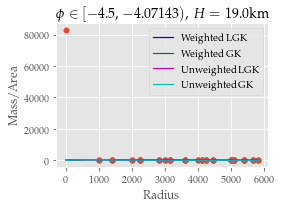

_______Phi:[-4.5,-4.07143) __ H:20500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.00000192 -0.00137665  1.00000033]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


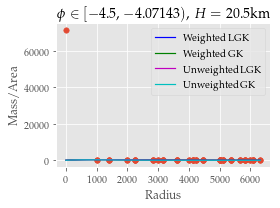

_______Phi:[-4.5,-4.07143) __ H:22000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.00000196 -0.00136438  1.00000034]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


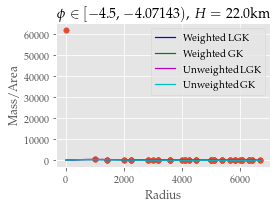

_______Phi:[-4.5,-4.07143) __ H:23500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.00000183 -0.00135447  1.00000032]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


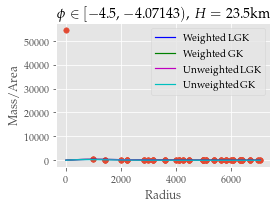

_______Phi:[-4.5,-4.07143) __ H:25000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.00000157 -0.00134643  1.00000028]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


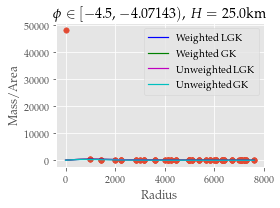

_______Phi:[-4.5,-4.07143) __ H:26500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.00000147 -0.00134345  1.00000026]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


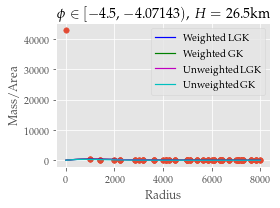

_______Phi:[-4.5,-4.07143) __ H:28000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.00000147 -0.00134196  1.00000026]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


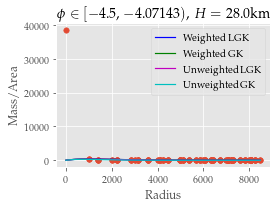

_______Phi:[-4.5,-4.07143) __ H:29500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.00000135 -0.00134137  1.00000024]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


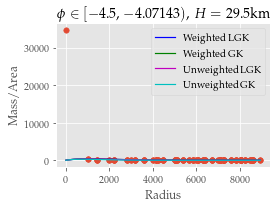

_______Phi:[-4.5,-4.07143) __ H:31000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.00000119 -0.00133836  1.00000022]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


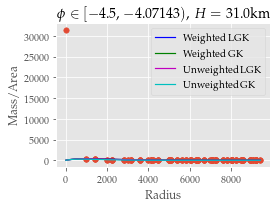

_______Phi:[-4.5,-4.07143) __ H:32500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.00000105 -0.00134279  1.0000002 ]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


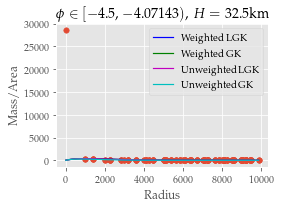

_______Phi:[-4.5,-4.07143) __ H:34000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.00000099 -0.00134443  1.00000018]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


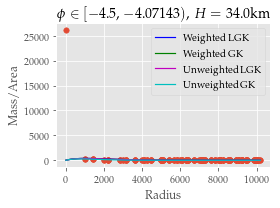

_______Phi:[-4.5,-4.07143) __ H:35500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.00000088 -0.00134664  1.00000017]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


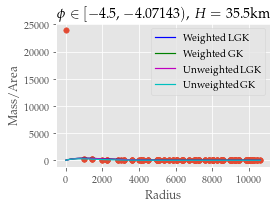

_______Phi:[-4.5,-4.07143) __ H:37000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.00000078 -0.00134929  1.00000015]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


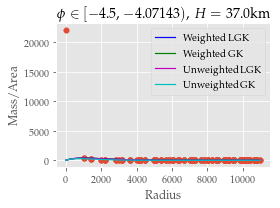

_______Phi:[-4.5,-4.07143) __ H:38500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.00000065 -0.00135214  1.00000013]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


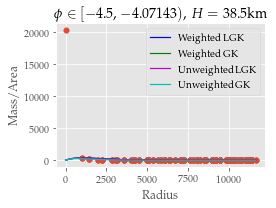

_______Phi:[-4.5,-4.07143) __ H:40000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.00000054 -0.00135912  1.00000012]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


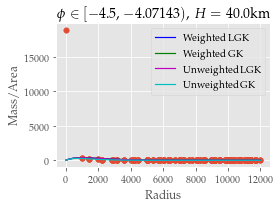

_______Phi:[-4.07143,-3.64286) __ H:10000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.00000192 -0.00142802  1.00000034]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


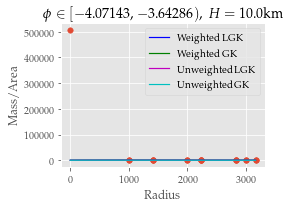

_______Phi:[-4.07143,-3.64286) __ H:11500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.00000099 -0.00131575  1.00000019]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


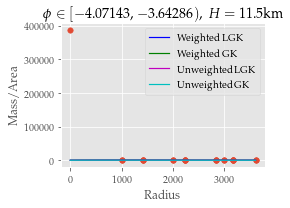

_______Phi:[-4.07143,-3.64286) __ H:13000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.00000112 -0.00124177  1.0000002 ]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


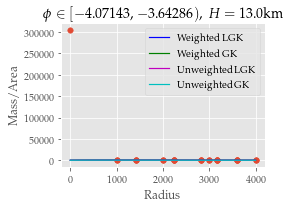

_______Phi:[-4.07143,-3.64286) __ H:14500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.00000116 -0.00120248  1.0000002 ]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


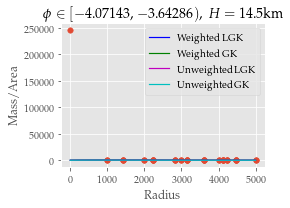

_______Phi:[-4.07143,-3.64286) __ H:16000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.00000112 -0.00116818  1.00000019]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


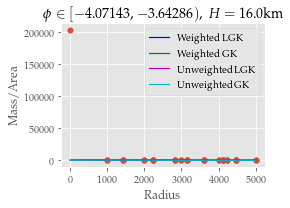

_______Phi:[-4.07143,-3.64286) __ H:17500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.00000108 -0.00114409  1.00000018]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


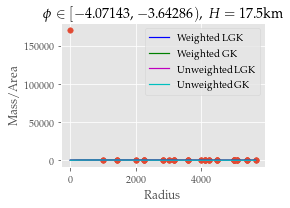

_______Phi:[-4.07143,-3.64286) __ H:19000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.00000101 -0.00112652  1.00000017]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


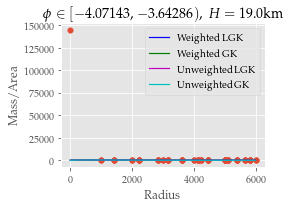

_______Phi:[-4.07143,-3.64286) __ H:20500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.00000094 -0.00111212  1.00000016]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


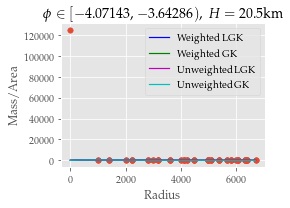

_______Phi:[-4.07143,-3.64286) __ H:22000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.00000087 -0.00109963  1.00000014]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


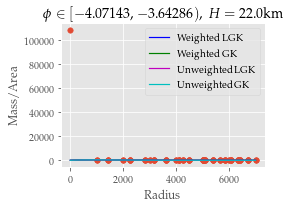

_______Phi:[-4.07143,-3.64286) __ H:23500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.00000081 -0.00108904  1.00000013]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


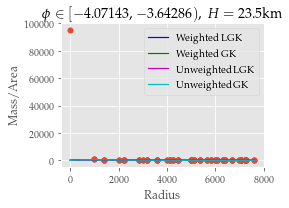

_______Phi:[-4.07143,-3.64286) __ H:25000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.00000074 -0.00108384  1.00000012]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


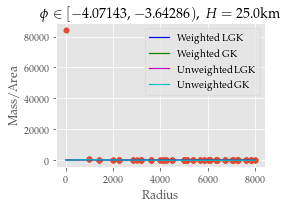

_______Phi:[-4.07143,-3.64286) __ H:26500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.00000049 -0.00107974  1.00000008]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


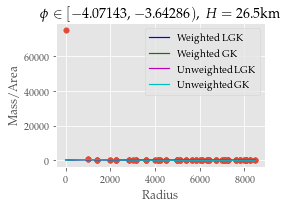

_______Phi:[-4.07143,-3.64286) __ H:28000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.00000044 -0.00107646  1.00000007]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


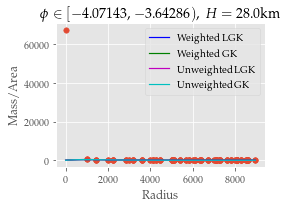

_______Phi:[-4.07143,-3.64286) __ H:29500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.00000039 -0.00107391  1.00000007]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


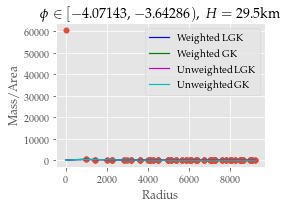

_______Phi:[-4.07143,-3.64286) __ H:31000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.00000034 -0.00107196  1.00000006]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


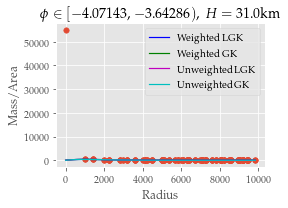

_______Phi:[-4.07143,-3.64286) __ H:32500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.00000029 -0.00107049  1.00000005]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


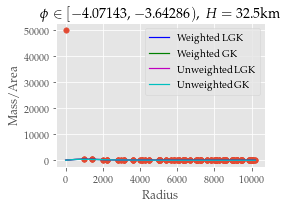

_______Phi:[-4.07143,-3.64286) __ H:34000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.00000025 -0.0010694   1.00000005]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


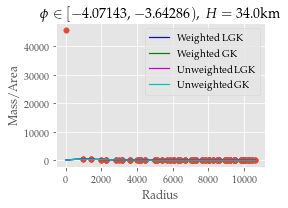

_______Phi:[-4.07143,-3.64286) __ H:35500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.0000007  -0.00107283  1.00000012]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


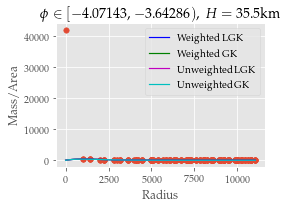

_______Phi:[-4.07143,-3.64286) __ H:37000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.00000024 -0.00107255  1.00000004]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


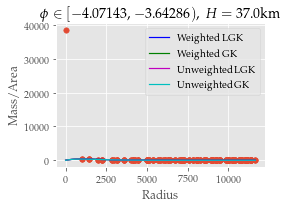

_______Phi:[-4.07143,-3.64286) __ H:38500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.00000019 -0.00107226  1.00000004]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


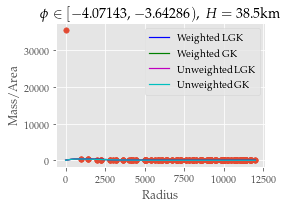

_______Phi:[-4.07143,-3.64286) __ H:40000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.00000012 -0.00107679  1.00000003]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


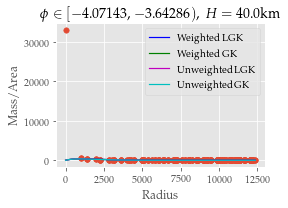

_______Phi:[-3.64286,-3.21429) __ H:10000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.00000102 -0.00112788  1.00000018]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


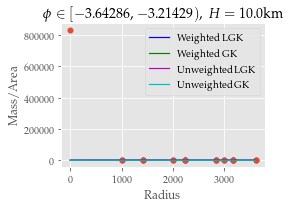

_______Phi:[-3.64286,-3.21429) __ H:11500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.00000057 -0.0010535   1.0000001 ]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


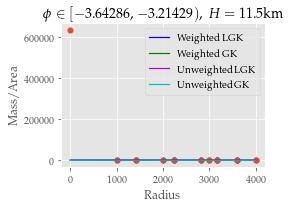

_______Phi:[-3.64286,-3.21429) __ H:13000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.00000072 -0.00101224  1.00000012]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


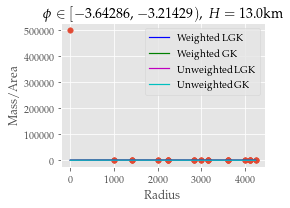

_______Phi:[-3.64286,-3.21429) __ H:14500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.31096249 -0.00219885  1.04695356]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


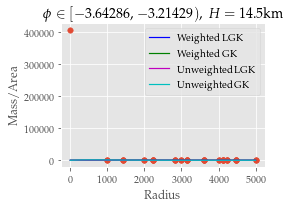

_______Phi:[-3.64286,-3.21429) __ H:16000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.29333528 -0.00206963  1.04341016]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


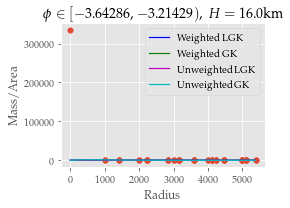

_______Phi:[-3.64286,-3.21429) __ H:17500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.27603069 -0.00196312  1.04022572]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


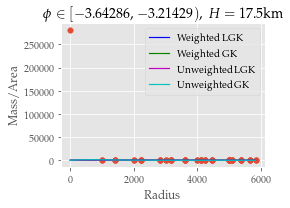

_______Phi:[-3.64286,-3.21429) __ H:19000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.26094056 -0.0018734   1.03763921]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


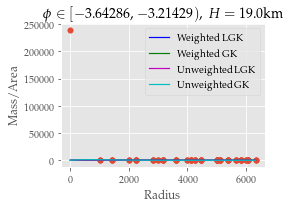

_______Phi:[-3.64286,-3.21429) __ H:20500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.24787197 -0.00179758  1.03544243]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


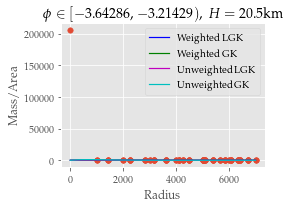

_______Phi:[-3.64286,-3.21429) __ H:22000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.23253935 -0.00172424  1.03311414]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


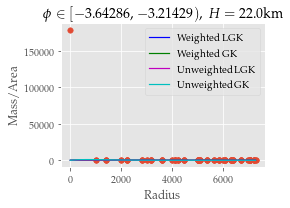

_______Phi:[-3.64286,-3.21429) __ H:23500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.22342306 -0.00167233  1.03159107]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


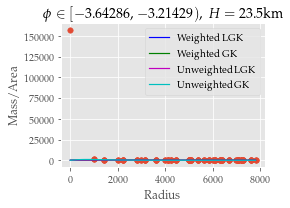

_______Phi:[-3.64286,-3.21429) __ H:25000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.21096939 -0.00161635  1.02971843]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


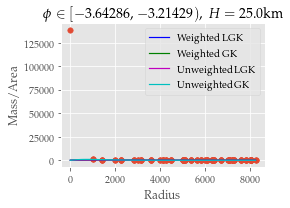

_______Phi:[-3.64286,-3.21429) __ H:26500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.19984007 -0.00156752  1.02802529]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


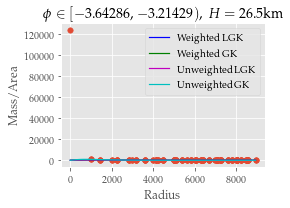

_______Phi:[-3.64286,-3.21429) __ H:28000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.18995103 -0.00152502  1.02655752]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


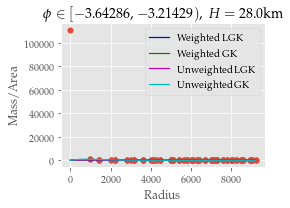

_______Phi:[-3.64286,-3.21429) __ H:29500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.17520799 -0.00147146  1.02442765]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


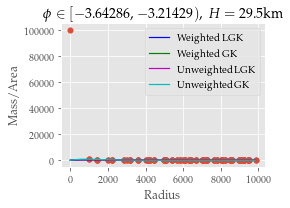

_______Phi:[-3.64286,-3.21429) __ H:31000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.16686176 -0.00143713  1.0232108 ]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


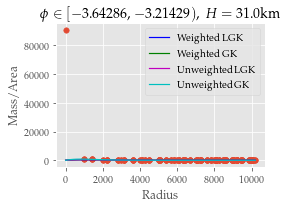

_______Phi:[-3.64286,-3.21429) __ H:32500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.15964782 -0.00140791  1.02216062]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


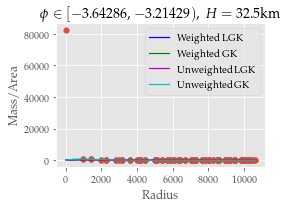

_______Phi:[-3.64286,-3.21429) __ H:34000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.14706109 -0.00136524  1.02036817]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


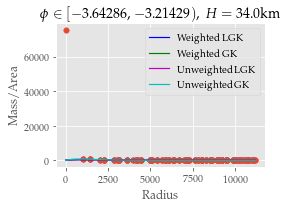

_______Phi:[-3.64286,-3.21429) __ H:35500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.14121327 -0.00134222  1.01952105]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


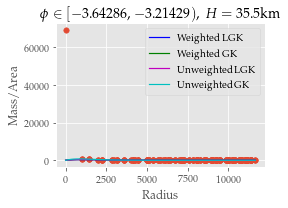

_______Phi:[-3.64286,-3.21429) __ H:37000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.12969332 -0.00130472  1.0178955 ]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


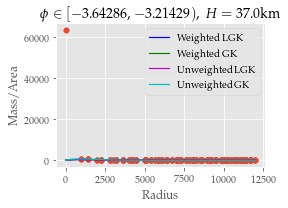

_______Phi:[-3.64286,-3.21429) __ H:38500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.12519161 -0.00128737  1.01724465]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


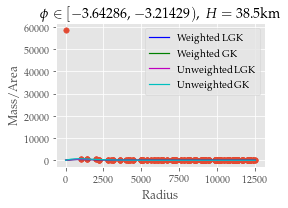

_______Phi:[-3.64286,-3.21429) __ H:40000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.11453547 -0.00125388  1.01574773]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


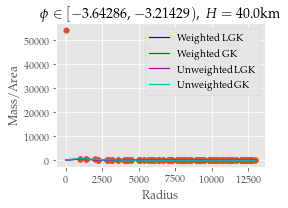

_______Phi:[-3.21429,-2.78571) __ H:10000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.42621535 -0.00264323  1.06206328]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


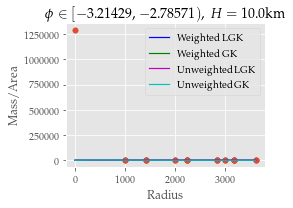

_______Phi:[-3.21429,-2.78571) __ H:11500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.40689473 -0.00242678  1.05816533]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


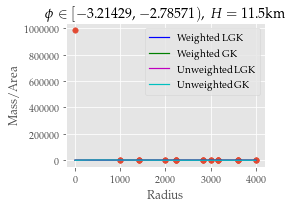

_______Phi:[-3.21429,-2.78571) __ H:13000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.39192024 -0.0022796   1.05610972]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


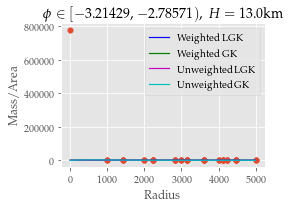

_______Phi:[-3.21429,-2.78571) __ H:14500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.37458892 -0.00215016  1.05315369]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


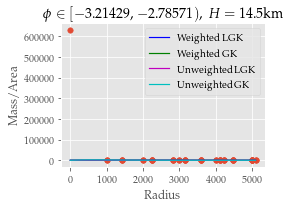

_______Phi:[-3.21429,-2.78571) __ H:16000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.35501023 -0.00203171  1.04971042]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


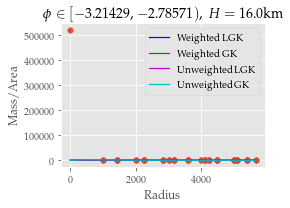

_______Phi:[-3.21429,-2.78571) __ H:17500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.33844171 -0.00193422  1.04722459]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


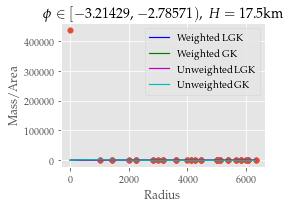

_______Phi:[-3.21429,-2.78571) __ H:19000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.32635423 -0.00186266  1.04537178]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


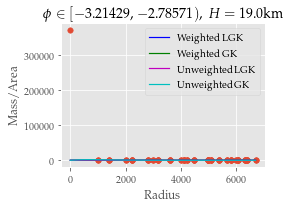

_______Phi:[-3.21429,-2.78571) __ H:20500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.30800202 -0.00177631  1.04267515]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


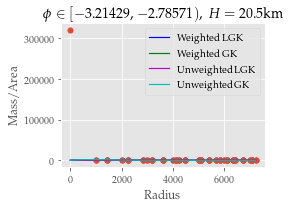

_______Phi:[-3.21429,-2.78571) __ H:22000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.30134673 -0.00173486  1.04170235]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


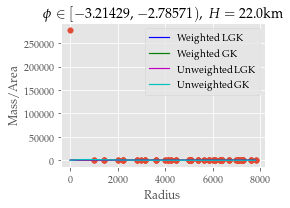

_______Phi:[-3.21429,-2.78571) __ H:23500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.28808258 -0.00167563  1.03971271]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


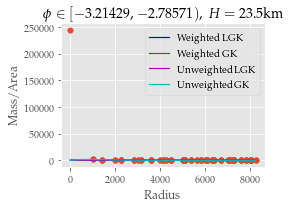

_______Phi:[-3.21429,-2.78571) __ H:25000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.27670267 -0.00162581  1.03808552]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


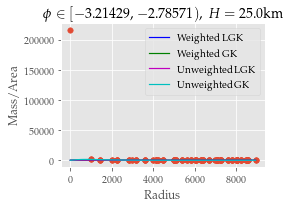

_______Phi:[-3.21429,-2.78571) __ H:26500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.25737239 -0.00155321  1.03529332]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


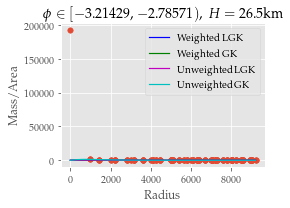

_______Phi:[-3.21429,-2.78571) __ H:28000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.24870019 -0.00151709  1.03407091]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


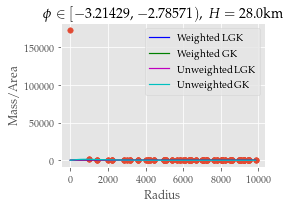

_______Phi:[-3.21429,-2.78571) __ H:29500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.2414596  -0.00148739  1.03304533]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


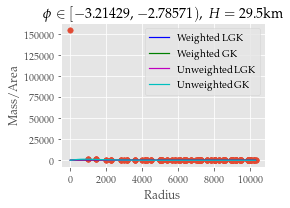

_______Phi:[-3.21429,-2.78571) __ H:31000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.22551436 -0.00143158  1.03075615]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


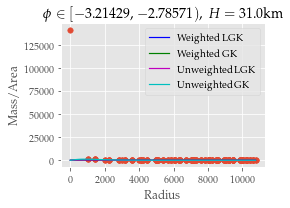

_______Phi:[-3.21429,-2.78571) __ H:32500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.22040083 -0.00141124  1.03003987]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


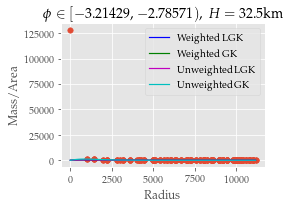

_______Phi:[-3.21429,-2.78571) __ H:34000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.2060537  -0.0013631   1.02802564]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


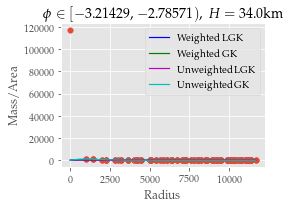

_______Phi:[-3.21429,-2.78571) __ H:35500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.20285279 -0.0013506   1.02756353]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


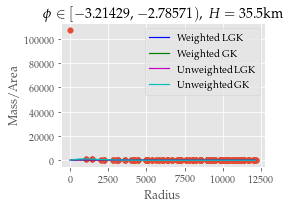

_______Phi:[-3.21429,-2.78571) __ H:37000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.18981434 -0.00130839  1.02575151]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


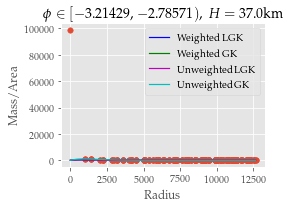

_______Phi:[-3.21429,-2.78571) __ H:38500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.18841268 -0.00130289  1.02556692]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


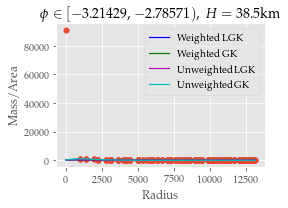

_______Phi:[-3.21429,-2.78571) __ H:40000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.17634223 -0.00126485  1.02388175]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


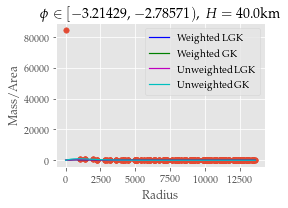

_______Phi:[-2.78571,-2.35714) __ H:10000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.49306636 -0.00258817  1.06944288]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


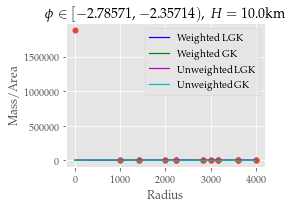

_______Phi:[-2.78571,-2.35714) __ H:11500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.47600632 -0.00242726  1.0673946 ]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


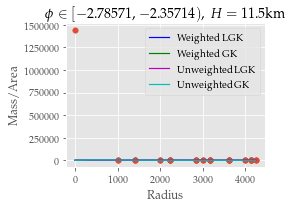

_______Phi:[-2.78571,-2.35714) __ H:13000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.45394399 -0.00226823  1.06357072]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


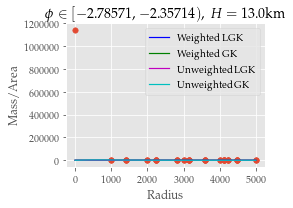

_______Phi:[-2.78571,-2.35714) __ H:14500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.43905046 -0.00215733  1.0611248 ]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


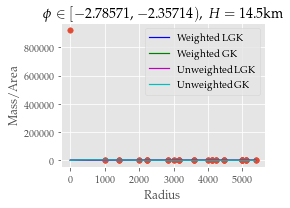

_______Phi:[-2.78571,-2.35714) __ H:16000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.42006269 -0.00204676  1.05831244]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


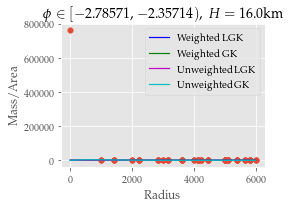

_______Phi:[-2.78571,-2.35714) __ H:17500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.40628505 -0.00196679  1.05613093]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


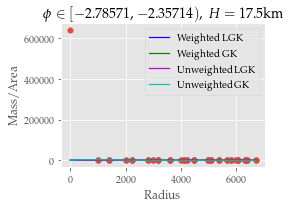

_______Phi:[-2.78571,-2.35714) __ H:19000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.38550845 -0.00186896  1.05323579]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


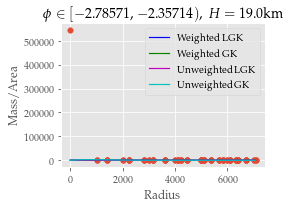

_______Phi:[-2.78571,-2.35714) __ H:20500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.36810528 -0.00178953  1.05063161]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


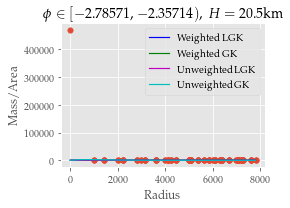

_______Phi:[-2.78571,-2.35714) __ H:22000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.3533783  -0.00172449  1.04849855]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


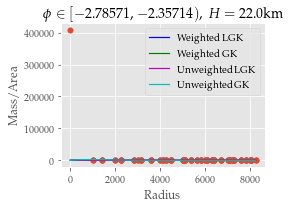

_______Phi:[-2.78571,-2.35714) __ H:23500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.34099002 -0.00167109  1.04668657]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


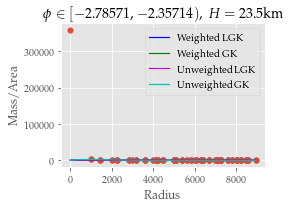

_______Phi:[-2.78571,-2.35714) __ H:25000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.33071502 -0.00162767  1.04514916]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


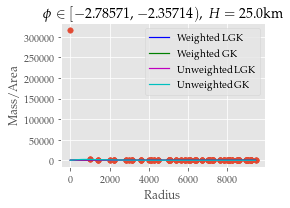

_______Phi:[-2.78571,-2.35714) __ H:26500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.322166   -0.00159266  1.04392987]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


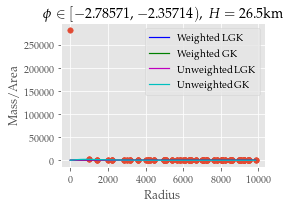

_______Phi:[-2.78571,-2.35714) __ H:28000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.3031294  -0.00152333  1.04126495]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


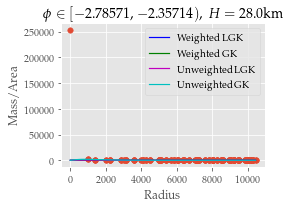

_______Phi:[-2.78571,-2.35714) __ H:29500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.29759711 -0.00150162  1.04047121]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


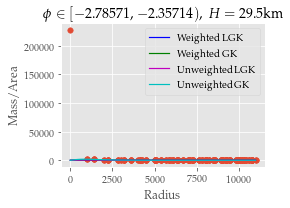

_______Phi:[-2.78571,-2.35714) __ H:31000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.28070683 -0.00144288  1.0380913 ]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


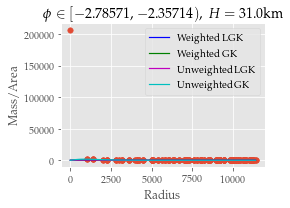

_______Phi:[-2.78571,-2.35714) __ H:32500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.27761333 -0.00143131  1.03765594]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


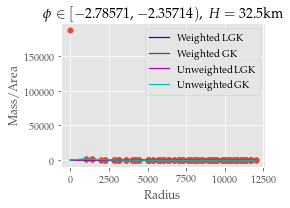

_______Phi:[-2.78571,-2.35714) __ H:34000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.26241534 -0.00138021  1.0355236 ]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


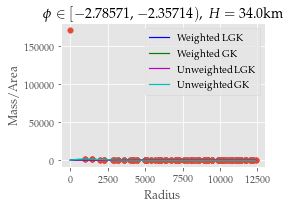

_______Phi:[-2.78571,-2.35714) __ H:35500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.26164037 -0.00137796  1.03542466]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


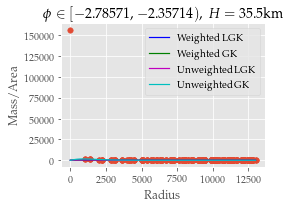

_______Phi:[-2.78571,-2.35714) __ H:37000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.24801512 -0.00133369  1.03351846]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


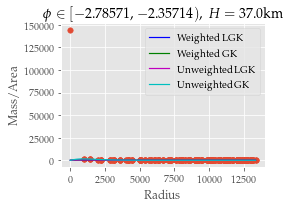

_______Phi:[-2.78571,-2.35714) __ H:38500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.23492295 -0.0012922   1.03169243]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


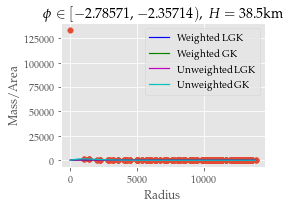

_______Phi:[-2.78571,-2.35714) __ H:40000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.23661434 -0.00129875  1.0319386 ]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


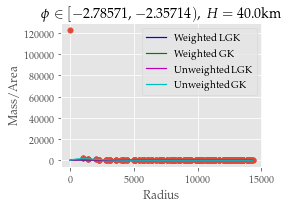

_______Phi:[-2.35714,-1.92857) __ H:10000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.56555233 -0.00264511  1.07708518]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


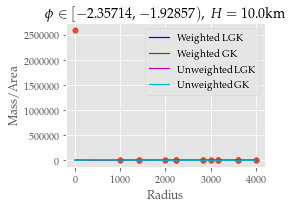

_______Phi:[-2.35714,-1.92857) __ H:11500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.53341851 -0.00242627  1.07437127]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


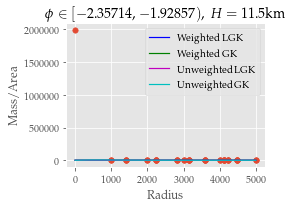

_______Phi:[-2.35714,-1.92857) __ H:13000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.51312199 -0.00228556  1.0714941 ]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


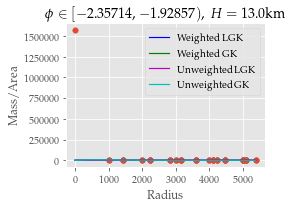

_______Phi:[-2.35714,-1.92857) __ H:14500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.48936986 -0.00214955  1.06779109]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


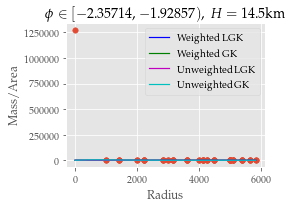

_______Phi:[-2.35714,-1.92857) __ H:16000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.47216617 -0.00205331  1.06570872]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


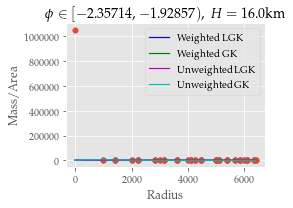

_______Phi:[-2.35714,-1.92857) __ H:17500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.44856955 -0.00194116  1.06162777]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


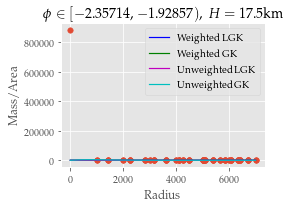

_______Phi:[-2.35714,-1.92857) __ H:19000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.44017253 -0.00189383  1.06059535]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


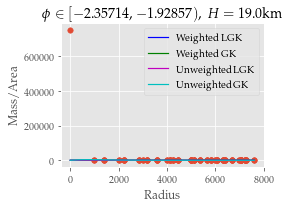

_______Phi:[-2.35714,-1.92857) __ H:20500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.42379977 -0.00182094  1.05809639]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


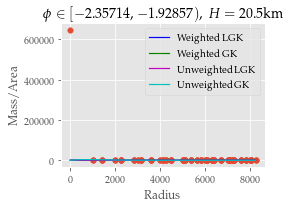

_______Phi:[-2.35714,-1.92857) __ H:22000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.39836241 -0.00171926  1.05438529]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


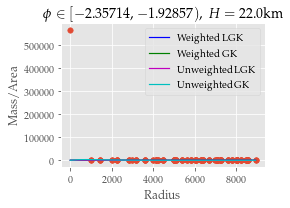

_______Phi:[-2.35714,-1.92857) __ H:23500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.38698383 -0.00167226  1.05285871]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


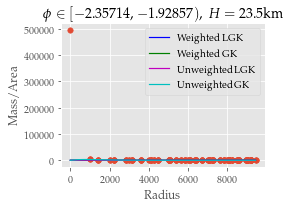

_______Phi:[-2.35714,-1.92857) __ H:25000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.37762983 -0.00163471  1.05145408]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


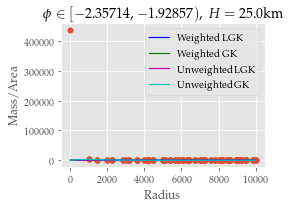

_______Phi:[-2.35714,-1.92857) __ H:26500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.35728318 -0.00155997  1.04846593]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


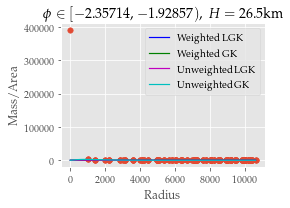

_______Phi:[-2.35714,-1.92857) __ H:28000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.35140419 -0.00153795  1.04768599]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


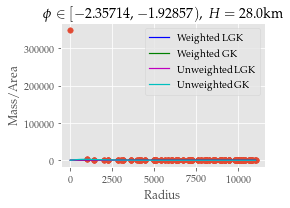

_______Phi:[-2.35714,-1.92857) __ H:29500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.33359337 -0.00147567  1.04518178]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


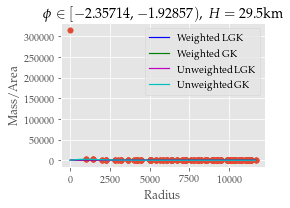

_______Phi:[-2.35714,-1.92857) __ H:31000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.33043238 -0.00146496  1.04473143]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


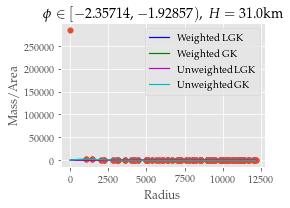

_______Phi:[-2.35714,-1.92857) __ H:32500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.31457866 -0.00141159  1.04252783]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


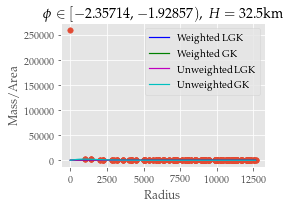

_______Phi:[-2.35714,-1.92857) __ H:34000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.3135426  -0.00140939  1.04238404]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


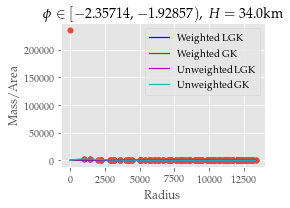

_______Phi:[-2.35714,-1.92857) __ H:35500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.29954698 -0.00136376  1.04043438]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


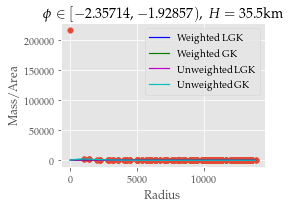

_______Phi:[-2.35714,-1.92857) __ H:37000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.28593472 -0.00132042  1.03853734]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


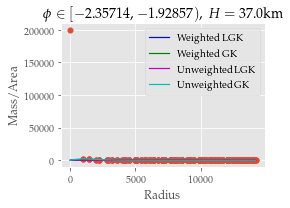

_______Phi:[-2.35714,-1.92857) __ H:38500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.28760791 -0.00132817  1.03876931]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


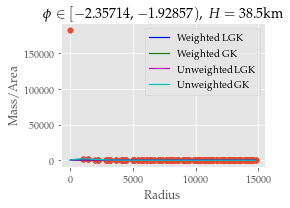

_______Phi:[-2.35714,-1.92857) __ H:40000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.2755261  -0.00129054  1.03709249]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


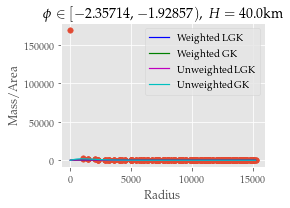

_______Phi:[-1.92857,-1.5) __ H:10000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.61243028 -0.00262924  1.08517981]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


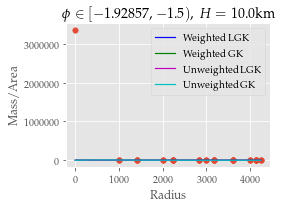

_______Phi:[-1.92857,-1.5) __ H:11500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.58198275 -0.00242977  1.08136745]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


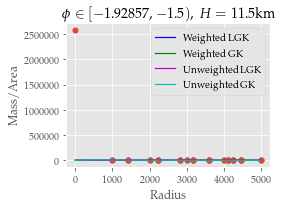

_______Phi:[-1.92857,-1.5) __ H:13000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.55327986 -0.00226591  1.07646712]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


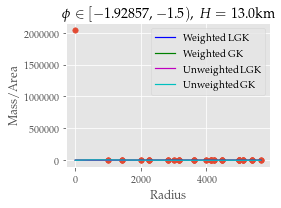

_______Phi:[-1.92857,-1.5) __ H:14500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.53092249 -0.00214341  1.07312424]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


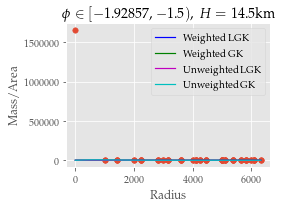

_______Phi:[-1.92857,-1.5) __ H:16000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.50393125 -0.00201445  1.06938061]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


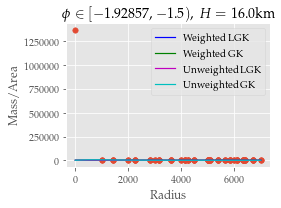

_______Phi:[-1.92857,-1.5) __ H:17500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.49241034 -0.00195413  1.06714274]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


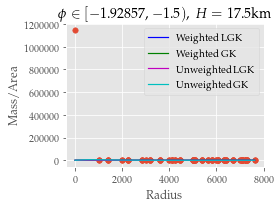

_______Phi:[-1.92857,-1.5) __ H:19000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.47405461 -0.00187329  1.06479665]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


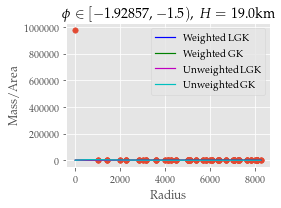

_______Phi:[-1.92857,-1.5) __ H:20500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.44724153 -0.00176465  1.06089149]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


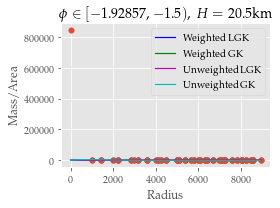

_______Phi:[-1.92857,-1.5) __ H:22000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.43525266 -0.00171659  1.05923972]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


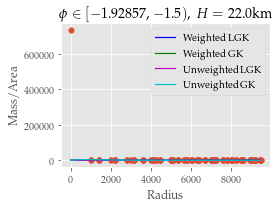

_______Phi:[-1.92857,-1.5) __ H:23500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.42363785 -0.00167041  1.0575217 ]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


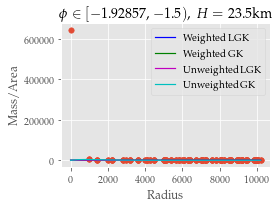

_______Phi:[-1.92857,-1.5) __ H:25000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.40284677 -0.00159388  1.05467167]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


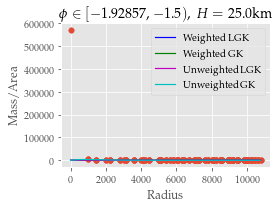

_______Phi:[-1.92857,-1.5) __ H:26500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.39573737 -0.00156829  1.0536111 ]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


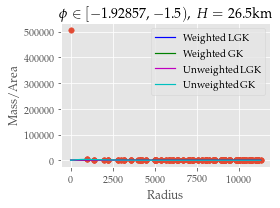

_______Phi:[-1.92857,-1.5) __ H:28000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.37747317 -0.00150423  1.05110176]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


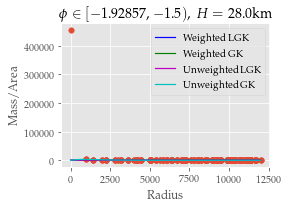

_______Phi:[-1.92857,-1.5) __ H:29500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.37330662 -0.00149116  1.05050482]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


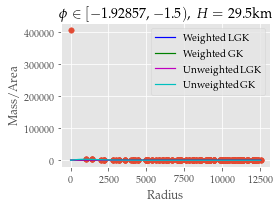

_______Phi:[-1.92857,-1.5) __ H:31000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.35731457 -0.00143743  1.04824434]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


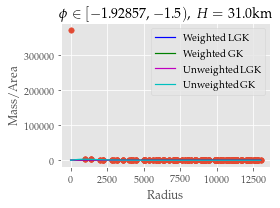

_______Phi:[-1.92857,-1.5) __ H:32500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.35492476 -0.00143178  1.04794197]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


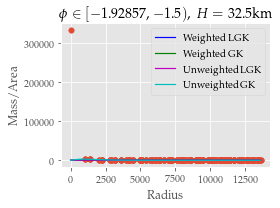

_______Phi:[-1.92857,-1.5) __ H:34000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.34112167 -0.00138689  1.04599482]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


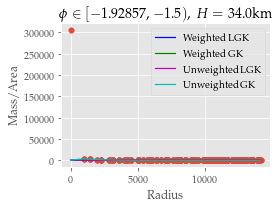

_______Phi:[-1.92857,-1.5) __ H:35500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.32758282 -0.00134396  1.04413354]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


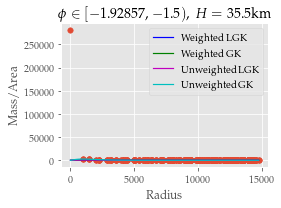

_______Phi:[-1.92857,-1.5) __ H:37000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.31428624e+00 -1.30268906e-03  1.04228217e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


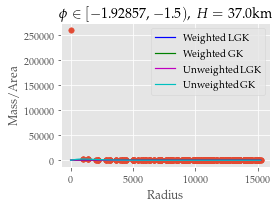

_______Phi:[-1.92857,-1.5) __ H:38500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.31583263e+00 -1.31107555e-03  1.04251849e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


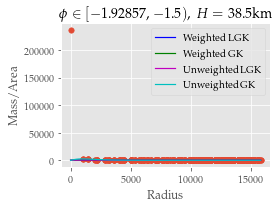

_______Phi:[-1.92857,-1.5) __ H:40000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.30441605e+00 -1.27666841e-03  1.04094080e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


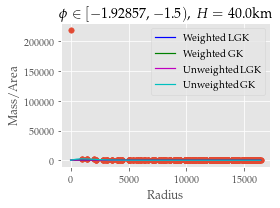

_______Phi:[-1.5,-1.07143) __ H:10000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.639187   -0.00257277  1.09049831]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


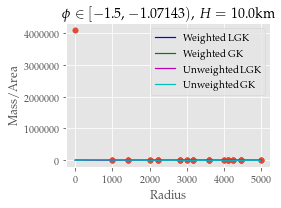

_______Phi:[-1.5,-1.07143) __ H:11500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.60956987 -0.00238867  1.08560735]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


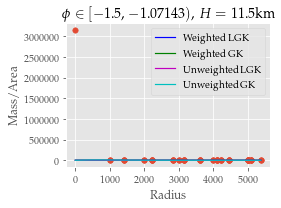

_______Phi:[-1.5,-1.07143) __ H:13000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.58142837 -0.00223507  1.08111393]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


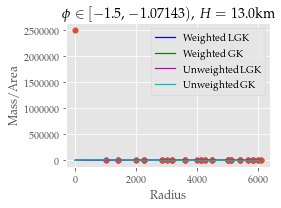

_______Phi:[-1.5,-1.07143) __ H:14500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.5508887  -0.00208579  1.07559963]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


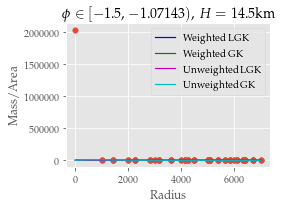

_______Phi:[-1.5,-1.07143) __ H:16000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.53525597 -0.00200978  1.07436867]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


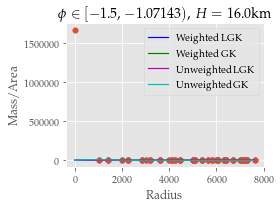

_______Phi:[-1.5,-1.07143) __ H:17500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.51413671 -0.00191603  1.07027872]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


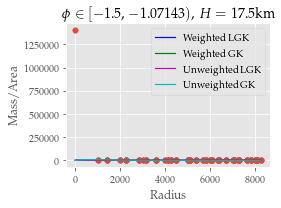

_______Phi:[-1.5,-1.07143) __ H:19000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.48695389 -0.00180497  1.06607643]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


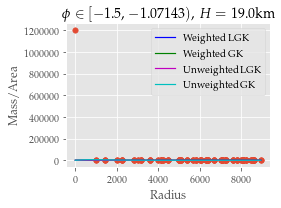

_______Phi:[-1.5,-1.07143) __ H:20500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.47192033 -0.00174495  1.06421148]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


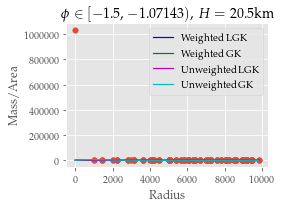

_______Phi:[-1.5,-1.07143) __ H:22000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.45925482 -0.0016964   1.06223956]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


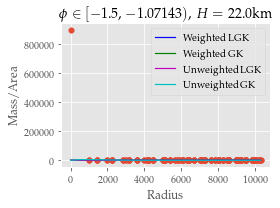

_______Phi:[-1.5,-1.07143) __ H:23500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.4380919  -0.00161845  1.05946606]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


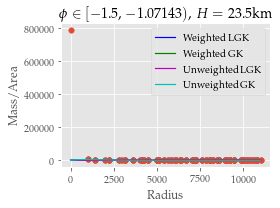

_______Phi:[-1.5,-1.07143) __ H:25000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.42939412 -0.00158842  1.05827264]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


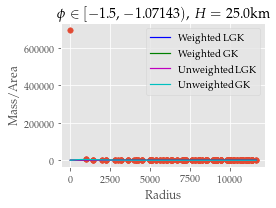

_______Phi:[-1.5,-1.07143) __ H:26500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.41128176 -0.00152516  1.05559028]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


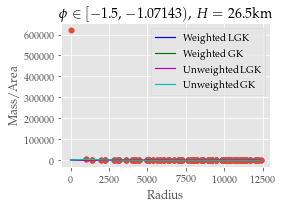

_______Phi:[-1.5,-1.07143) __ H:28000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.4047311  -0.00150421  1.05471794]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


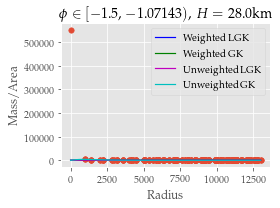

_______Phi:[-1.5,-1.07143) __ H:29500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.38950172 -0.00145442  1.05258939]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


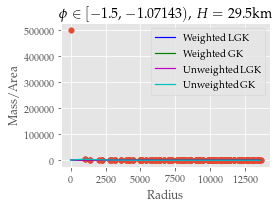

_______Phi:[-1.5,-1.07143) __ H:31000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.37413866 -0.00140453  1.05040983]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


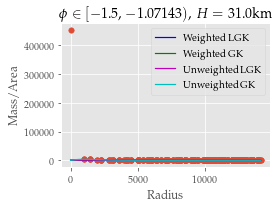

_______Phi:[-1.5,-1.07143) __ H:32500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.37130215 -0.00139881  1.0500321 ]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


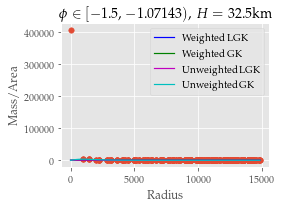

_______Phi:[-1.5,-1.07143) __ H:34000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.35816687e+00 -1.35775801e-03  1.04817487e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


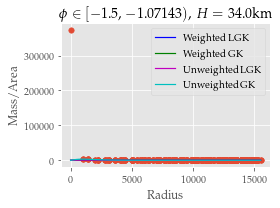

_______Phi:[-1.5,-1.07143) __ H:35500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.34525177e+00 -1.31812356e-03  1.04644410e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


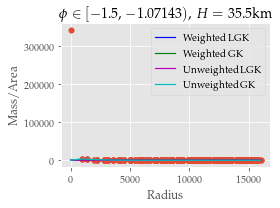

_______Phi:[-1.5,-1.07143) __ H:37000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.33256759e+00 -1.28008509e-03  1.04468318e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


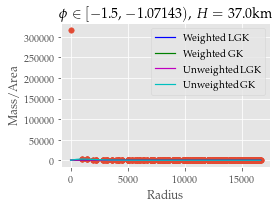

_______Phi:[-1.5,-1.07143) __ H:38500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.32011350e+00 -1.24334727e-03  1.04294789e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


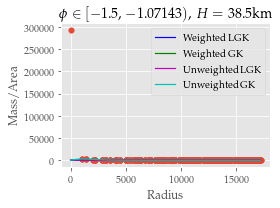

_______Phi:[-1.5,-1.07143) __ H:40000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.32200050e+00 -1.25381452e-03  1.04325704e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


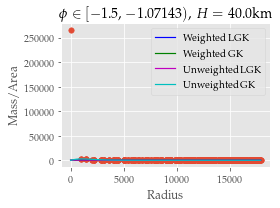

_______Phi:[-1.07143,-0.642857) __ H:10000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.65153532 -0.00248839  1.09045491]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


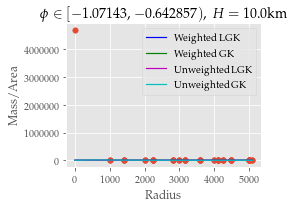

_______Phi:[-1.07143,-0.642857) __ H:11500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.61596232 -0.00229391  1.0855172 ]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


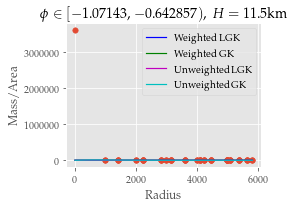

_______Phi:[-1.07143,-0.642857) __ H:13000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.58830246 -0.00215247  1.08221622]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


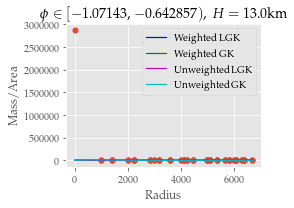

_______Phi:[-1.07143,-0.642857) __ H:14500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.56033962 -0.00202236  1.07585425]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


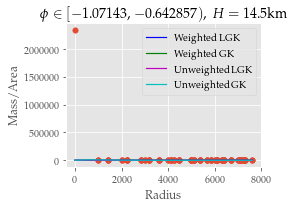

_______Phi:[-1.07143,-0.642857) __ H:16000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.5367686  -0.00192091  1.07343595]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


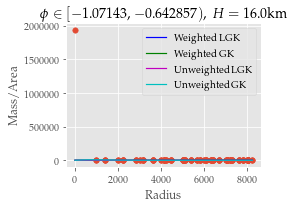

_______Phi:[-1.07143,-0.642857) __ H:17500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.5162237  -0.00183584  1.07066973]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


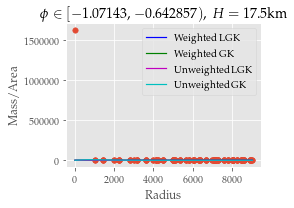

_______Phi:[-1.07143,-0.642857) __ H:19000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.49887675 -0.00176742  1.06802585]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


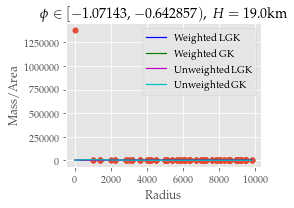

_______Phi:[-1.07143,-0.642857) __ H:20500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.48416046 -0.00171238  1.06557984]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


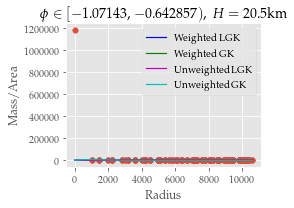

_______Phi:[-1.07143,-0.642857) __ H:22000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.46303313 -0.00163556  1.0629061 ]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


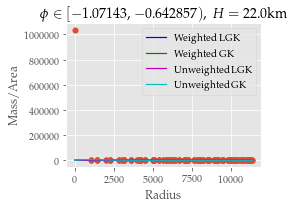

_______Phi:[-1.07143,-0.642857) __ H:23500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.45226895 -0.00159919  1.06144913]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


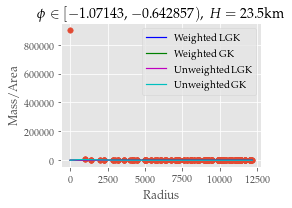

_______Phi:[-1.07143,-0.642857) __ H:25000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.43414157 -0.00153729  1.05859385]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


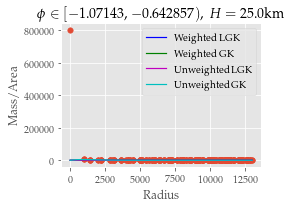

_______Phi:[-1.07143,-0.642857) __ H:26500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.41665716 -0.0014792   1.05621966]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


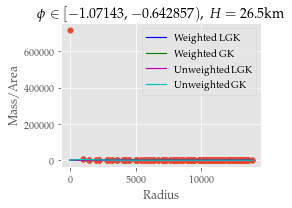

_______Phi:[-1.07143,-0.642857) __ H:28000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.40999811 -0.00146067  1.05526033]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


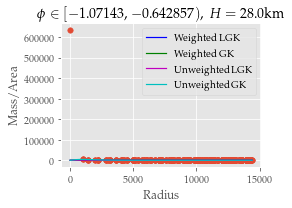

_______Phi:[-1.07143,-0.642857) __ H:29500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.39516541 -0.00141384  1.05331621]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


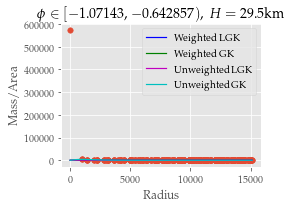

_______Phi:[-1.07143,-0.642857) __ H:31000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.38058079e+00 -1.36859894e-03  1.05115940e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


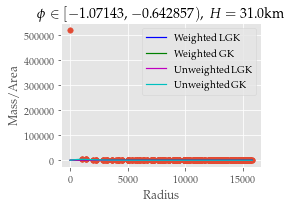

_______Phi:[-1.07143,-0.642857) __ H:32500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.36633307e+00 -1.32542524e-03  1.04922655e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


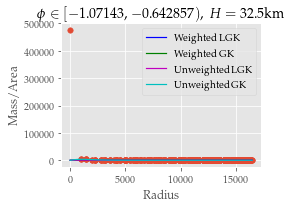

_______Phi:[-1.07143,-0.642857) __ H:34000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.36401867e+00 -1.32321732e-03  1.04897367e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


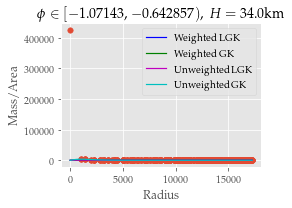

_______Phi:[-1.07143,-0.642857) __ H:35500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.35195765e+00 -1.28804127e-03  1.04730134e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


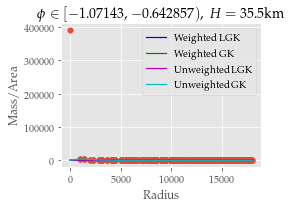

_______Phi:[-1.07143,-0.642857) __ H:37000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.34010513e+00 -1.25404942e-03  1.04564975e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


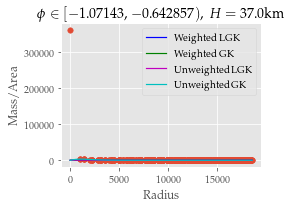

_______Phi:[-1.07143,-0.642857) __ H:38500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.32846088e+00 -1.22115766e-03  1.04402576e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


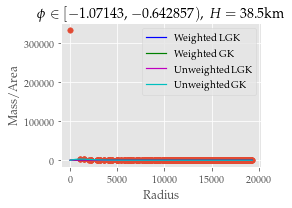

_______Phi:[-1.07143,-0.642857) __ H:40000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.31562132e+00 -1.18455530e-03  1.04231059e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


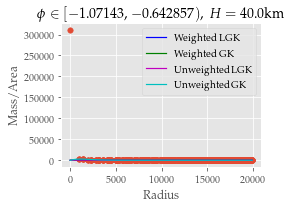

_______Phi:[-0.642857,-0.214286) __ H:10000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.65464762 -0.00241691  1.09206195]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


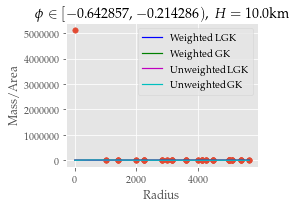

_______Phi:[-0.642857,-0.214286) __ H:11500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.61960785 -0.00223523  1.08738147]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


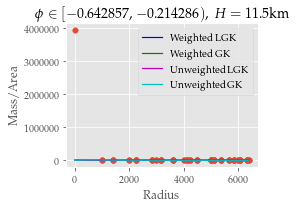

_______Phi:[-0.642857,-0.214286) __ H:13000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.58669643 -0.00207889  1.07853423]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


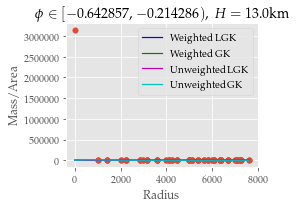

_______Phi:[-0.642857,-0.214286) __ H:14500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.56499614 -0.00198346  1.07836283]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


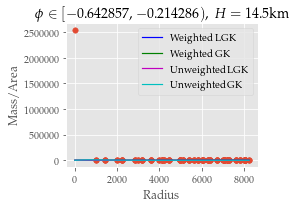

_______Phi:[-0.642857,-0.214286) __ H:16000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.53442642 -0.00185803  1.07303979]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


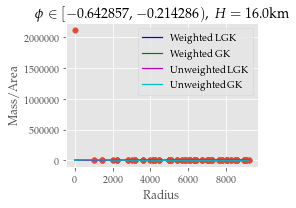

_______Phi:[-0.642857,-0.214286) __ H:17500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.51504847 -0.00178333  1.07055527]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


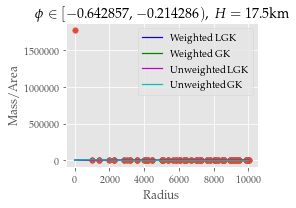

_______Phi:[-0.642857,-0.214286) __ H:19000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.49788345 -0.00171991  1.0672249 ]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


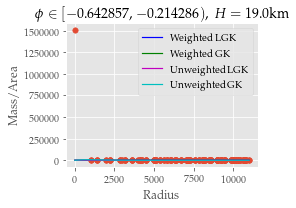

_______Phi:[-0.642857,-0.214286) __ H:20500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.47472587 -0.00163673  1.0644108 ]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


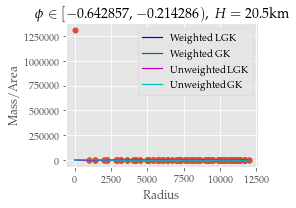

_______Phi:[-0.642857,-0.214286) __ H:22000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.4615618  -0.00159191  1.062716  ]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


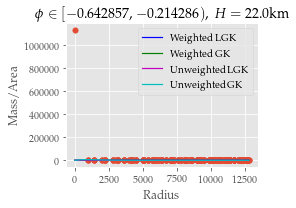

_______Phi:[-0.642857,-0.214286) __ H:23500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.44295824 -0.00153115  1.05978618]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


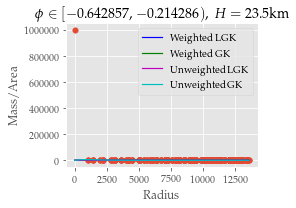

_______Phi:[-0.642857,-0.214286) __ H:25000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.43338717 -0.0015032   1.0585714 ]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


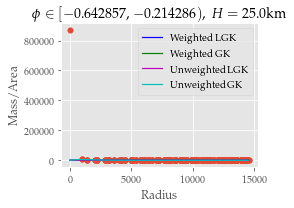

_______Phi:[-0.642857,-0.214286) __ H:26500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.4168909  -0.00145091  1.05618223]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


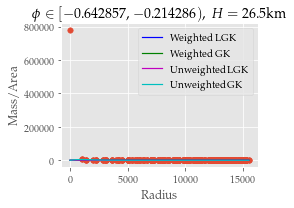

_______Phi:[-0.642857,-0.214286) __ H:28000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.40066095e+00 -1.40058314e-03  1.05391139e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


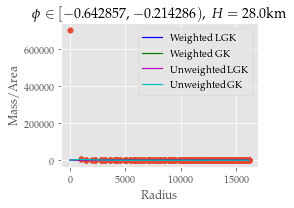

_______Phi:[-0.642857,-0.214286) __ H:29500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.39442119e+00 -1.38605298e-03  1.05310990e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


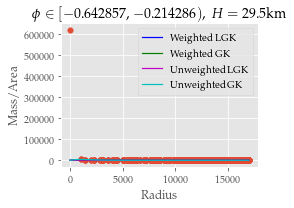

_______Phi:[-0.642857,-0.214286) __ H:31000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.38089314e+00 -1.34598771e-03  1.05111429e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


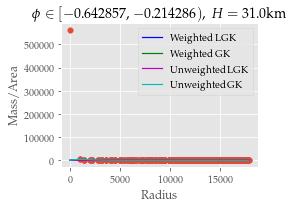

_______Phi:[-0.642857,-0.214286) __ H:32500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.36730097e+00 -1.30637385e-03  1.04938635e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


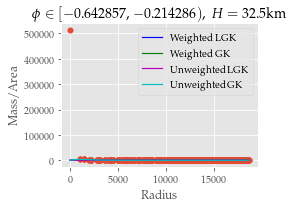

_______Phi:[-0.642857,-0.214286) __ H:34000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.35446169e+00 -1.27000250e-03  1.04760074e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


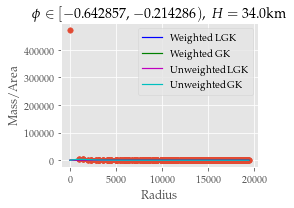

_______Phi:[-0.642857,-0.214286) __ H:35500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.34135851e+00 -1.23311036e-03  1.04580884e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


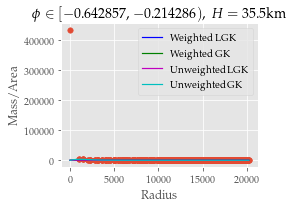

_______Phi:[-0.642857,-0.214286) __ H:37000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.33964671e+00 -1.23408596e-03  1.04556136e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


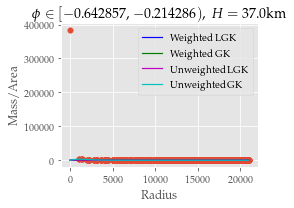

_______Phi:[-0.642857,-0.214286) __ H:38500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.32878737e+00 -1.20484000e-03  1.04402830e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


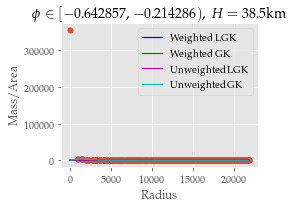

_______Phi:[-0.642857,-0.214286) __ H:40000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.31847088e+00 -1.17760488e-03  1.04263914e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


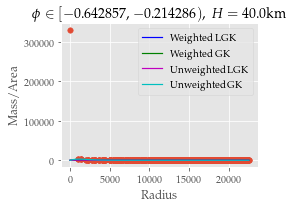

_______Phi:[-0.214286,0.214286) __ H:10000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.62669659 -0.00223743  1.08661728]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


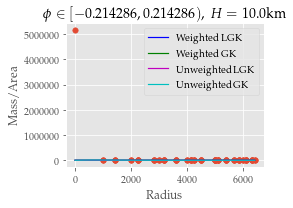

_______Phi:[-0.214286,0.214286) __ H:11500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.59139945 -0.00207519  1.08011719]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


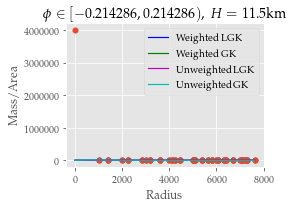

_______Phi:[-0.214286,0.214286) __ H:13000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.55834084 -0.00193309  1.0755404 ]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


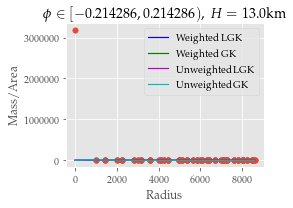

_______Phi:[-0.214286,0.214286) __ H:14500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.53162743 -0.00182797  1.07302794]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


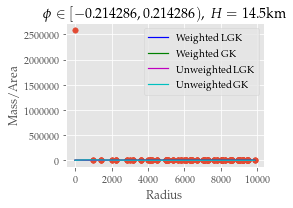

_______Phi:[-0.214286,0.214286) __ H:16000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.50910512 -0.00174325  1.06834586]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


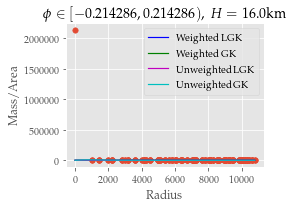

_______Phi:[-0.214286,0.214286) __ H:17500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.48902408 -0.00167309  1.06628685]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


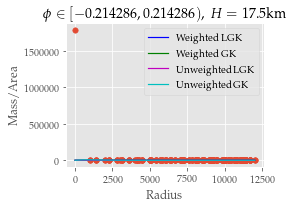

_______Phi:[-0.214286,0.214286) __ H:19000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.46548156 -0.0015919   1.0634057 ]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


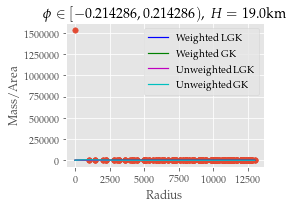

_______Phi:[-0.214286,0.214286) __ H:20500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.45044302 -0.00154474  1.0610232 ]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


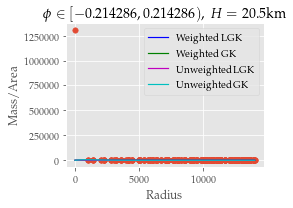

_______Phi:[-0.214286,0.214286) __ H:22000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.43124427 -0.00148362  1.05830808]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


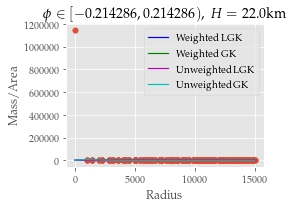

_______Phi:[-0.214286,0.214286) __ H:23500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.41239168 -0.00142485  1.0554328 ]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


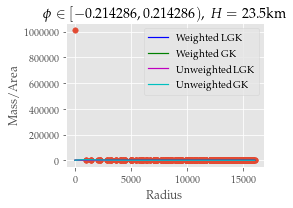

_______Phi:[-0.214286,0.214286) __ H:25000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.40206856e+00 -1.39759505e-03  1.05418867e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


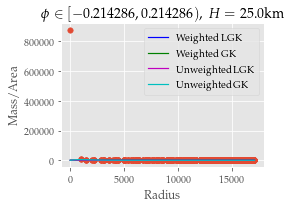

_______Phi:[-0.214286,0.214286) __ H:26500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.38632128e+00 -1.35183591e-03  1.05195954e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


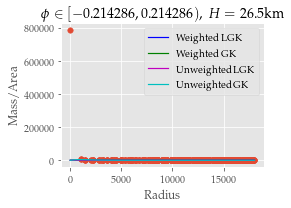

_______Phi:[-0.214286,0.214286) __ H:28000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.37095572e+00 -1.30762332e-03  1.04993939e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


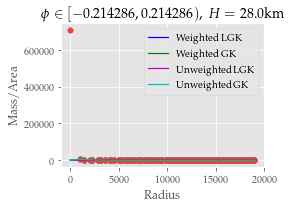

_______Phi:[-0.214286,0.214286) __ H:29500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.35583355e+00 -1.26488504e-03  1.04771703e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


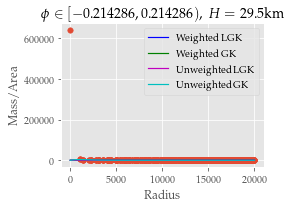

_______Phi:[-0.214286,0.214286) __ H:31000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.34987261e+00 -1.25339897e-03  1.04680751e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


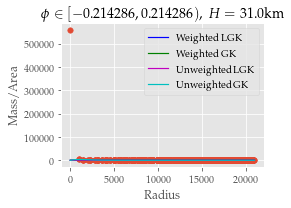

_______Phi:[-0.214286,0.214286) __ H:32500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.33730497e+00 -1.21986752e-03  1.04529163e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


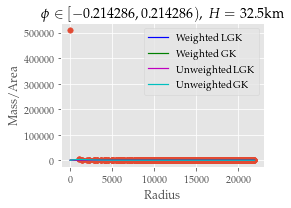

_______Phi:[-0.214286,0.214286) __ H:34000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.32505988e+00 -1.18755061e-03  1.04353059e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


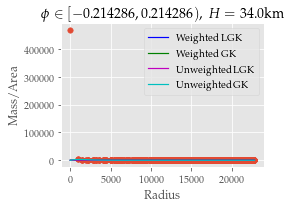

_______Phi:[-0.214286,0.214286) __ H:35500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.31294826e+00 -1.15595711e-03  1.04187024e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


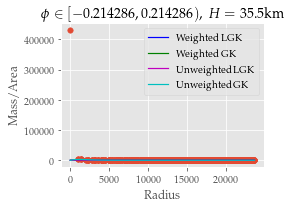

_______Phi:[-0.214286,0.214286) __ H:37000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.30101664e+00 -1.12523015e-03  1.04025154e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


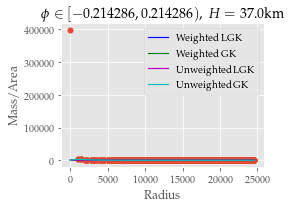

_______Phi:[-0.214286,0.214286) __ H:38500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.28916888e+00 -1.09493963e-03  1.03865107e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


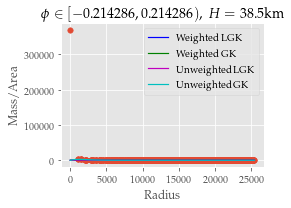

_______Phi:[-0.214286,0.214286) __ H:40000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.27744552e+00 -1.06546515e-03  1.03704487e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


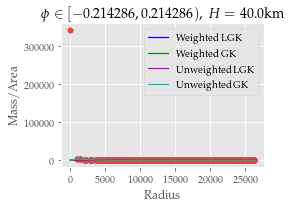

_______Phi:[0.214286,0.642857) __ H:10000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.57857246 -0.00202318  1.07920328]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


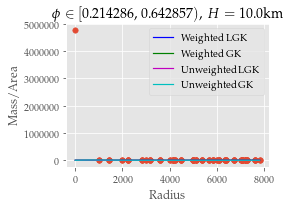

_______Phi:[0.214286,0.642857) __ H:11500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.54382301 -0.00188177  1.07441338]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


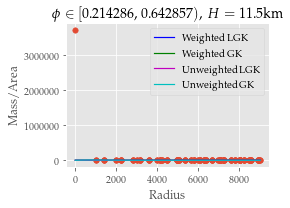

_______Phi:[0.214286,0.642857) __ H:13000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.51326255 -0.00176494  1.06908711]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


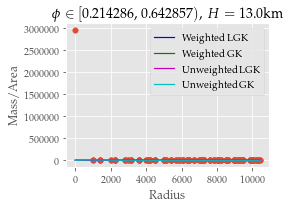

_______Phi:[0.214286,0.642857) __ H:14500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.48687632 -0.00167119  1.0656475 ]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


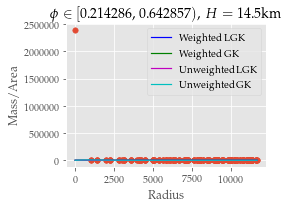

_______Phi:[0.214286,0.642857) __ H:16000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.46435833 -0.00159726  1.06329093]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


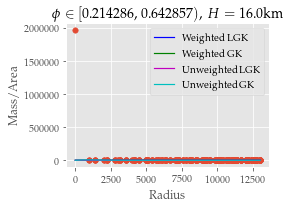

_______Phi:[0.214286,0.642857) __ H:17500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.44136192 -0.00152412  1.05982082]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


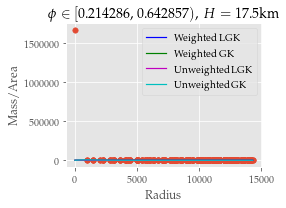

_______Phi:[0.214286,0.642857) __ H:19000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.42287487 -0.00146746  1.05671614]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


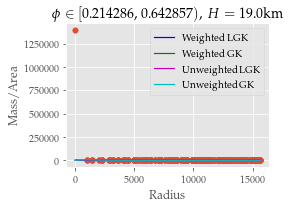

_______Phi:[0.214286,0.642857) __ H:20500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.40360964 -0.00141024  1.05423404]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


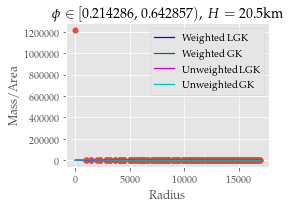

_______Phi:[0.214286,0.642857) __ H:22000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.38415678e+00 -1.35398183e-03  1.05115366e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


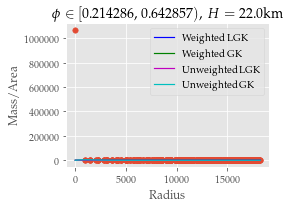

_______Phi:[0.214286,0.642857) __ H:23500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.37099641e+00 -1.31986578e-03  1.04962515e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


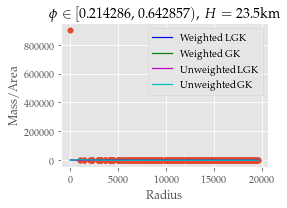

_______Phi:[0.214286,0.642857) __ H:25000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.35517648e+00 -1.27701004e-03  1.04758635e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


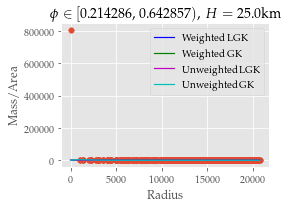

_______Phi:[0.214286,0.642857) __ H:26500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.34000973e+00 -1.23678514e-03  1.04563274e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


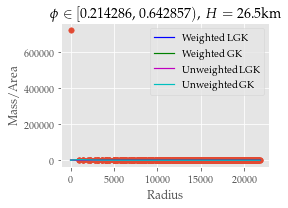

_______Phi:[0.214286,0.642857) __ H:28000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.32541479e+00 -1.19879771e-03  1.04363718e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


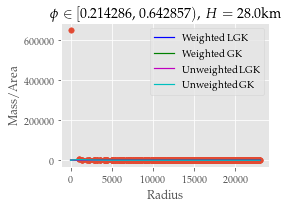

_______Phi:[0.214286,0.642857) __ H:29500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.31080315e+00 -1.16098674e-03  1.04164824e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


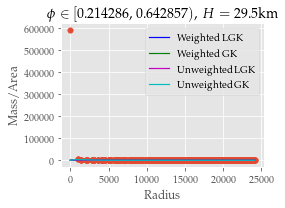

_______Phi:[0.214286,0.642857) __ H:31000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.29663284e+00 -1.12483694e-03  1.03964598e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


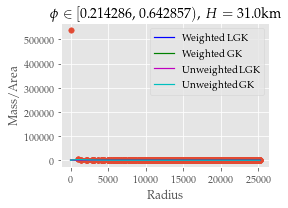

_______Phi:[0.214286,0.642857) __ H:32500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.28992058e+00 -1.11289971e-03  1.03876442e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


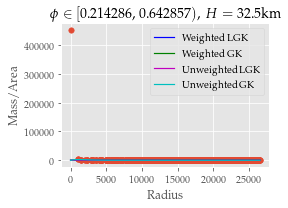

_______Phi:[0.214286,0.642857) __ H:34000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.27821403e+00 -1.08478455e-03  1.03716744e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


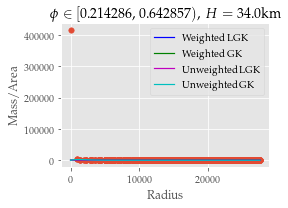

_______Phi:[0.214286,0.642857) __ H:35500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.26693614e+00 -1.05826111e-03  1.03572740e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


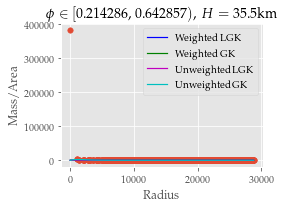

_______Phi:[0.214286,0.642857) __ H:37000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.25578627e+00 -1.03208030e-03  1.03418022e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


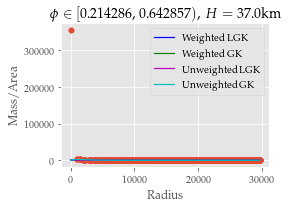

_______Phi:[0.214286,0.642857) __ H:38500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.24336005e+00 -1.00155743e-03  1.03248696e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


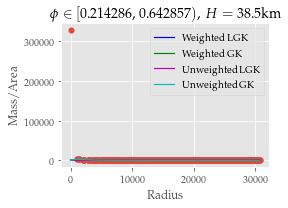

_______Phi:[0.214286,0.642857) __ H:40000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.23420683e+00 -9.82329478e-04  1.03125800e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


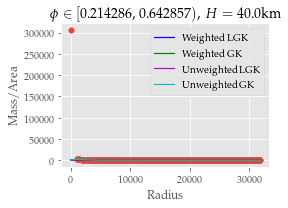

_______Phi:[0.642857,1.07143) __ H:10000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.51914969 -0.0018203   1.07172564]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


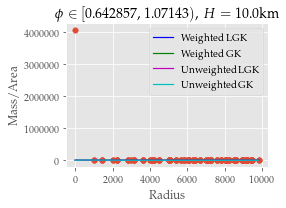

_______Phi:[0.642857,1.07143) __ H:11500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.4889513  -0.00171557  1.06713965]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


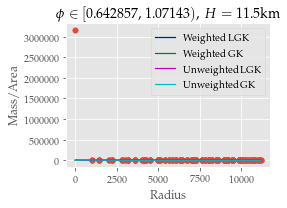

_______Phi:[0.642857,1.07143) __ H:13000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.45538624 -0.00159803  1.06252323]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


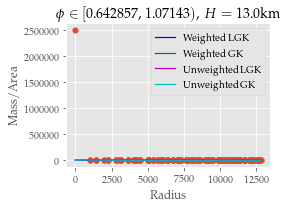

_______Phi:[0.642857,1.07143) __ H:14500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.42953091 -0.00151677  1.05863795]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


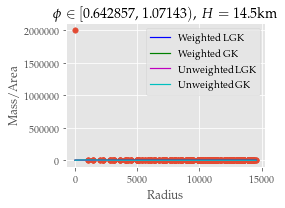

_______Phi:[0.642857,1.07143) __ H:16000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.40510426 -0.00144349  1.05467937]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


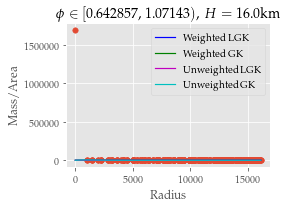

_______Phi:[0.642857,1.07143) __ H:17500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.38163380e+00 -1.37511634e-03  1.05106076e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


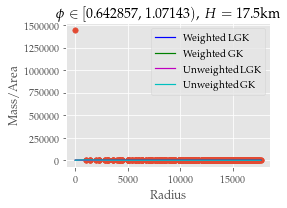

_______Phi:[0.642857,1.07143) __ H:19000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.36361268e+00 -1.32764141e-03  1.04891302e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


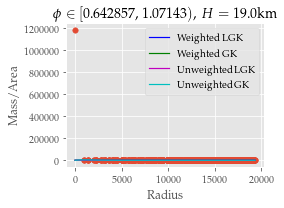

_______Phi:[0.642857,1.07143) __ H:20500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.34465505e+00 -1.27732615e-03  1.04645748e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


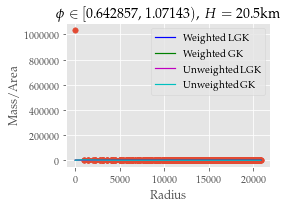

_______Phi:[0.642857,1.07143) __ H:22000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.32630197e+00 -1.22923488e-03  1.04397409e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


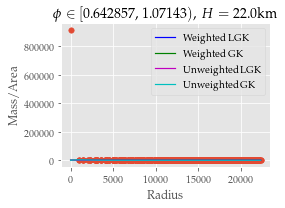

_______Phi:[0.642857,1.07143) __ H:23500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.30868637e+00 -1.18406362e-03  1.04122451e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


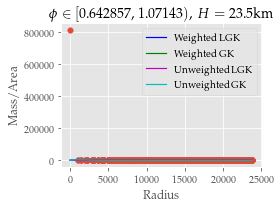

_______Phi:[0.642857,1.07143) __ H:25000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.29603446e+00 -1.15562318e-03  1.03961444e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


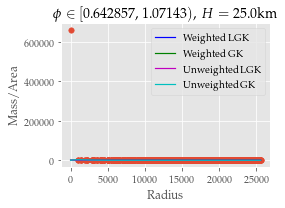

_______Phi:[0.642857,1.07143) __ H:26500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.28146293e+00 -1.12080516e-03  1.03765104e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


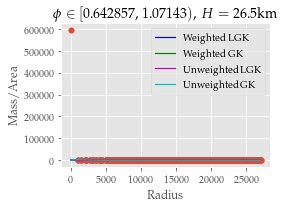

_______Phi:[0.642857,1.07143) __ H:28000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.26716773e+00 -1.08686616e-03  1.03570900e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


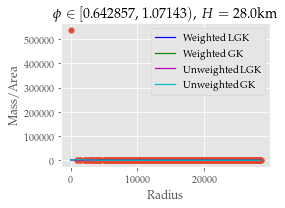

_______Phi:[0.642857,1.07143) __ H:29500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.25374791e+00 -1.05602769e-03  1.03394101e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


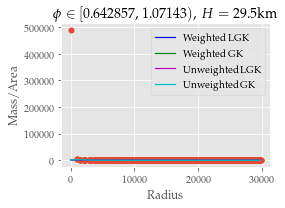

_______Phi:[0.642857,1.07143) __ H:31000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.24056873e+00 -1.02584169e-03  1.03213102e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


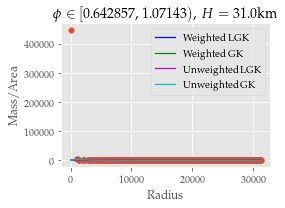

_______Phi:[0.642857,1.07143) __ H:32500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.22876055e+00 -1.00041367e-03  1.03057767e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


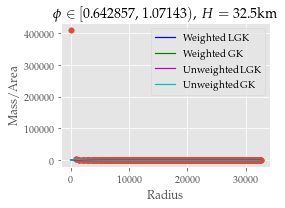

_______Phi:[0.642857,1.07143) __ H:34000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.21482949e+00 -9.67634753e-04  1.02866743e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


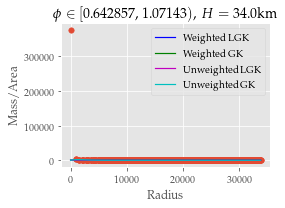

_______Phi:[0.642857,1.07143) __ H:35500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.20228617e+00 -9.39669270e-04  1.02699926e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


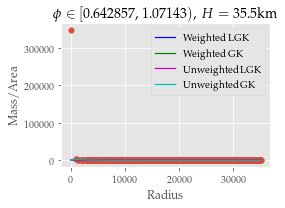

_______Phi:[0.642857,1.07143) __ H:37000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.19506094e+00 -9.27277749e-04  1.02601848e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


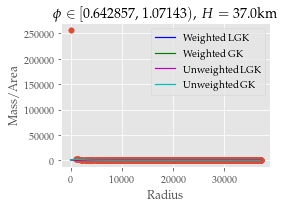

_______Phi:[0.642857,1.07143) __ H:38500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.18455820e+00 -9.05216222e-04  1.02459536e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


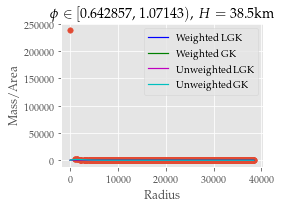

_______Phi:[0.642857,1.07143) __ H:40000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.17426112e+00 -8.83756799e-04  1.02321762e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


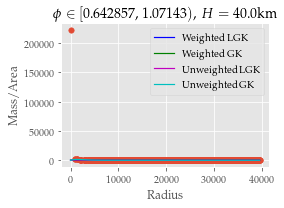

_______Phi:[1.07143,1.5) __ H:10000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.45156496 -0.00163948  1.05964099]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


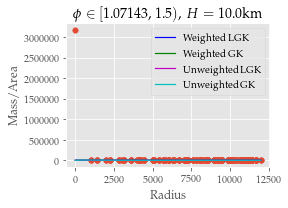

_______Phi:[1.07143,1.5) __ H:11500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.4153416  -0.001521    1.05476166]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


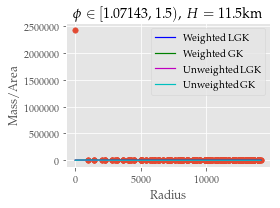

_______Phi:[1.07143,1.5) __ H:13000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.38511373 -0.00143349  1.05192106]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


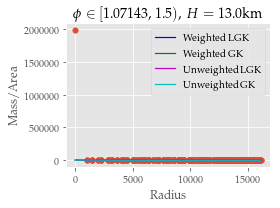

_______Phi:[1.07143,1.5) __ H:14500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.35927297 -0.00136155  1.04813358]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


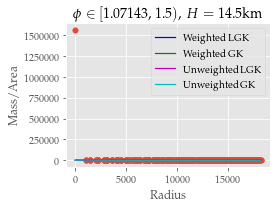

_______Phi:[1.07143,1.5) __ H:16000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.33538564e+00 -1.29824398e-03  1.04537653e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


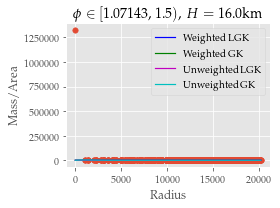

_______Phi:[1.07143,1.5) __ H:17500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.31236820e+00 -1.23832313e-03  1.04222309e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


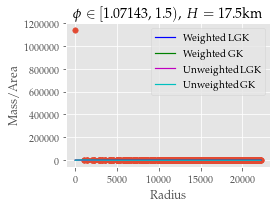

_______Phi:[1.07143,1.5) __ H:19000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.29361825e+00 -1.19334448e-03  1.03935233e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


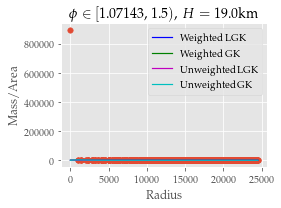

_______Phi:[1.07143,1.5) __ H:20500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.27474711e+00 -1.14790876e-03  1.03660023e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


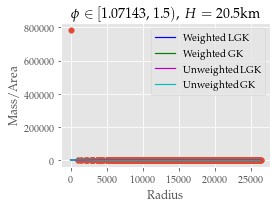

_______Phi:[1.07143,1.5) __ H:22000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.25697693e+00 -1.10661912e-03  1.03439708e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


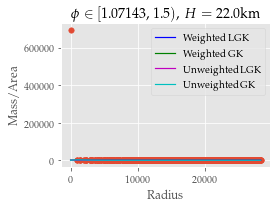

_______Phi:[1.07143,1.5) __ H:23500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.24072090e+00 -1.06983087e-03  1.03228031e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


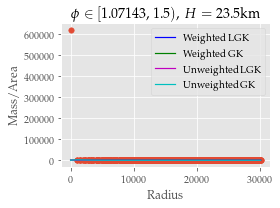

_______Phi:[1.07143,1.5) __ H:25000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.22454955e+00 -1.03320145e-03  1.02997373e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


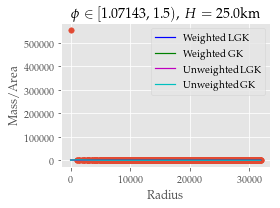

_______Phi:[1.07143,1.5) __ H:26500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.20960880e+00 -1.00100212e-03  1.02803824e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


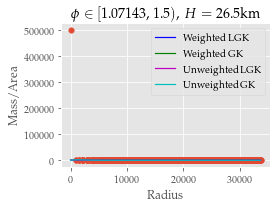

_______Phi:[1.07143,1.5) __ H:28000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.19642643e+00 -9.73266288e-04  1.02622662e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


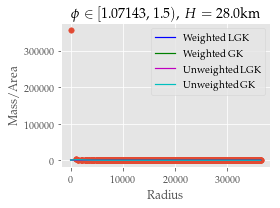

_______Phi:[1.07143,1.5) __ H:29500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.18308203e+00 -9.45330743e-04  1.02445034e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


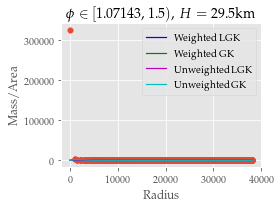

_______Phi:[1.07143,1.5) __ H:31000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.17025432e+00 -9.18797423e-04  1.02268251e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


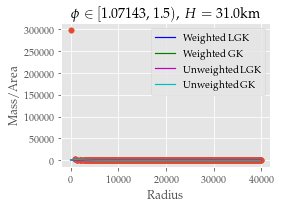

_______Phi:[1.07143,1.5) __ H:32500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.15792371e+00 -8.93669565e-04  1.02104983e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


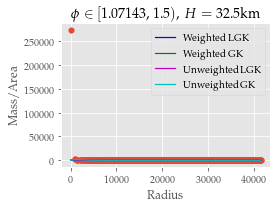

_______Phi:[1.07143,1.5) __ H:34000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.14614169e+00 -8.70067190e-04  1.01947572e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


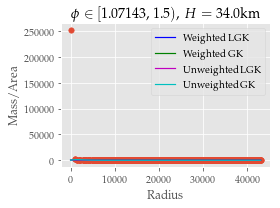

_______Phi:[1.07143,1.5) __ H:35500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.13482592e+00 -8.47719997e-04  1.01796193e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


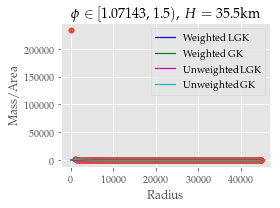

_______Phi:[1.07143,1.5) __ H:37000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.12382824e+00 -8.26244754e-04  1.01647813e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


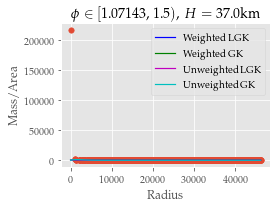

_______Phi:[1.07143,1.5) __ H:38500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.11322358e+00 -8.05812158e-04  1.01505707e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


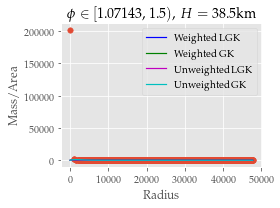

_______Phi:[1.07143,1.5) __ H:40000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.10263290e+00 -7.85381532e-04  1.01365272e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


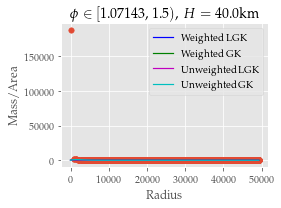

_______Phi:[1.5,1.92857) __ H:10000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.36897722 -0.00145558  1.05017607]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


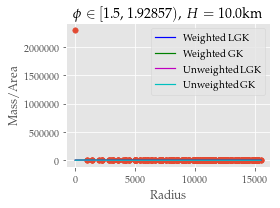

_______Phi:[1.5,1.92857) __ H:11500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.3352304  -0.00136189  1.04492308]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


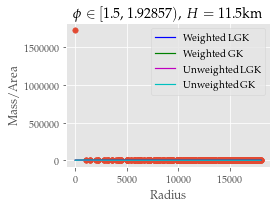

_______Phi:[1.5,1.92857) __ H:13000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.30429374e+00 -1.27813913e-03  1.04104217e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


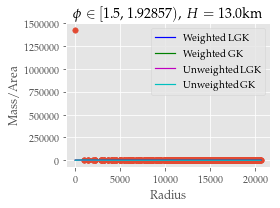

_______Phi:[1.5,1.92857) __ H:14500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.27852146e+00 -1.21458782e-03  1.03775013e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


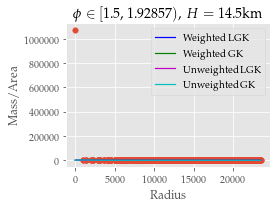

_______Phi:[1.5,1.92857) __ H:16000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.25512458e+00 -1.15947590e-03  1.03373584e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


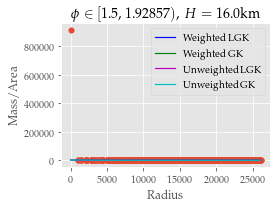

_______Phi:[1.5,1.92857) __ H:17500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.23327487e+00 -1.10929750e-03  1.03103989e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


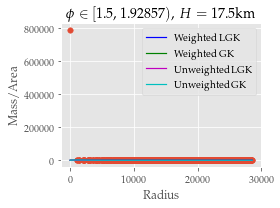

_______Phi:[1.5,1.92857) __ H:19000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.21311092e+00 -1.06462512e-03  1.02846512e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


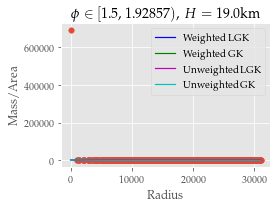

_______Phi:[1.5,1.92857) __ H:20500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.18909142e+00 -1.00554164e-03  1.02526520e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


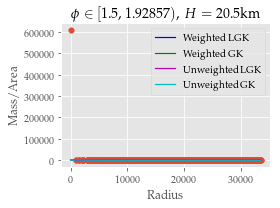

_______Phi:[1.5,1.92857) __ H:22000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.18037171e+00 -9.99537598e-04  1.02409281e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


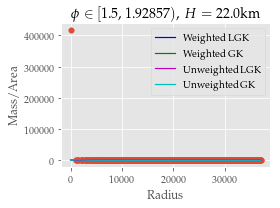

_______Phi:[1.5,1.92857) __ H:23500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.16046536e+00 -9.53799990e-04  1.02147037e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


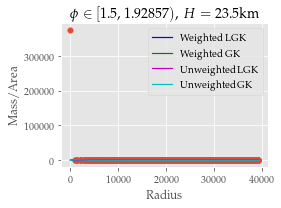

_______Phi:[1.5,1.92857) __ H:25000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.14502652e+00 -9.22926100e-04  1.01936328e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


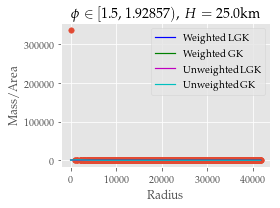

_______Phi:[1.5,1.92857) __ H:26500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.13029392e+00 -8.93771820e-04  1.01737942e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


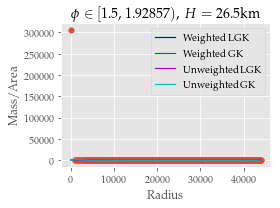

_______Phi:[1.5,1.92857) __ H:28000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.11656550e+00 -8.67270881e-04  1.01553142e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


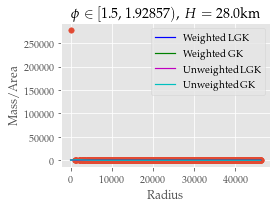

_______Phi:[1.5,1.92857) __ H:29500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.10346823e+00 -8.42577445e-04  1.01379172e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


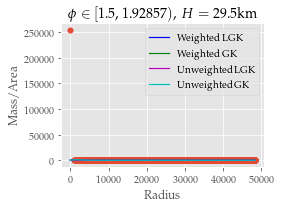

_______Phi:[1.5,1.92857) __ H:31000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.09091624e+00 -8.19188460e-04  1.01213039e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


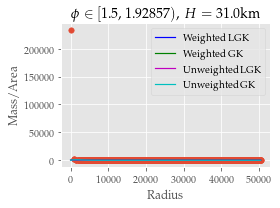

_______Phi:[1.5,1.92857) __ H:32500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.07818035e+00 -7.94992354e-04  1.01041531e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


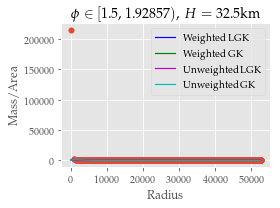

_______Phi:[1.5,1.92857) __ H:34000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.06640536e+00 -7.73628790e-04  1.00884152e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


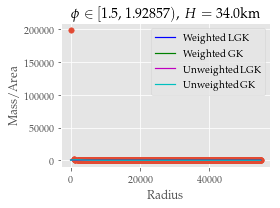

_______Phi:[1.5,1.92857) __ H:35500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.05452881e+00 -7.51783966e-04  1.00725242e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


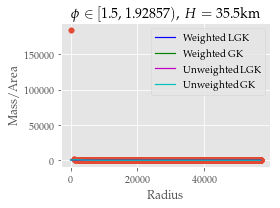

_______Phi:[1.5,1.92857) __ H:37000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.04266522e+00 -7.29925407e-04  1.00567778e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


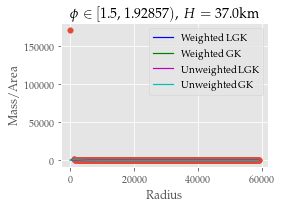

_______Phi:[1.5,1.92857) __ H:38500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.03100718e+00 -7.08672992e-04  1.00412673e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


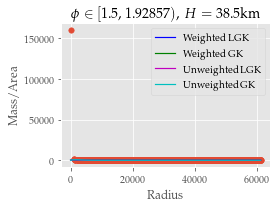

_______Phi:[1.5,1.92857) __ H:40000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.01909452e+00 -6.86854120e-04  1.00253858e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


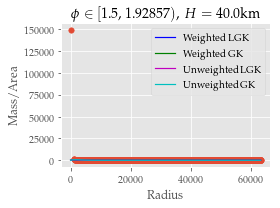

_______Phi:[1.92857,2.35714) __ H:10000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.27568493 -0.00127909  1.03650424]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


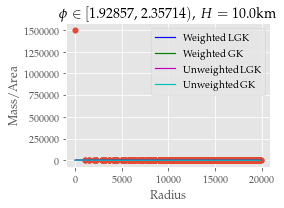

_______Phi:[1.92857,2.35714) __ H:11500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.24341894e+00 -1.20214474e-03  1.03255345e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


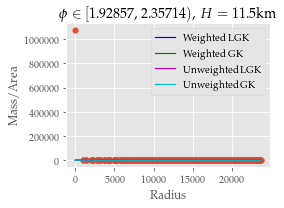

_______Phi:[1.92857,2.35714) __ H:13000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.21464112e+00 -1.13602365e-03  1.02887234e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


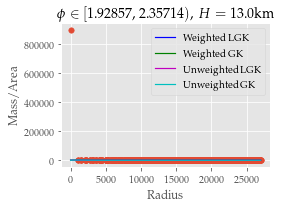

_______Phi:[1.92857,2.35714) __ H:14500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.18893621e+00 -1.07918186e-03  1.02524825e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


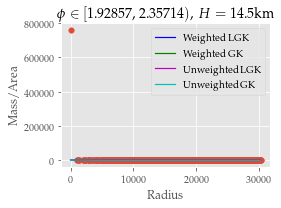

_______Phi:[1.92857,2.35714) __ H:16000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.15753026e+00 -1.00123313e-03  1.02103311e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


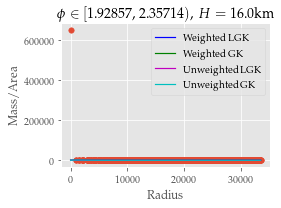

_______Phi:[1.92857,2.35714) __ H:17500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.14424624e+00 -9.87060627e-04  1.01923986e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


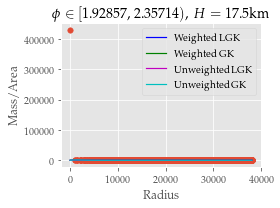

_______Phi:[1.92857,2.35714) __ H:19000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.12342057e+00 -9.43840463e-04  1.01650130e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


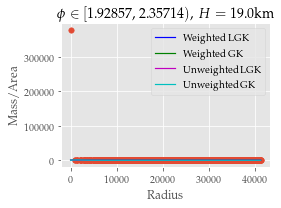

_______Phi:[1.92857,2.35714) __ H:20500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.10527020e+00 -9.10220707e-04  1.01405348e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


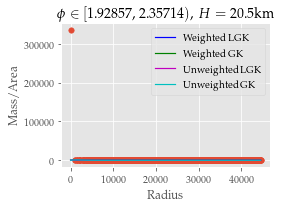

_______Phi:[1.92857,2.35714) __ H:22000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.08858657e+00 -8.78520987e-04  1.01181155e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


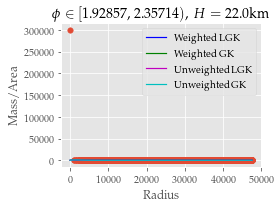

_______Phi:[1.92857,2.35714) __ H:23500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.07275139e+00 -8.49830026e-04  1.00972704e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


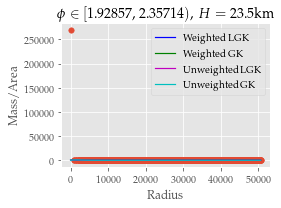

_______Phi:[1.92857,2.35714) __ H:25000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.05759809e+00 -8.22421486e-04  1.00767766e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


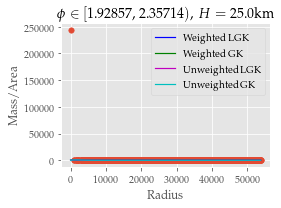

_______Phi:[1.92857,2.35714) __ H:26500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.04291711e+00 -7.96094105e-04  1.00572116e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


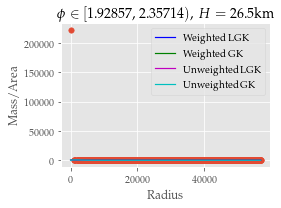

_______Phi:[1.92857,2.35714) __ H:28000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.02904073e+00 -7.71631455e-04  1.00387178e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


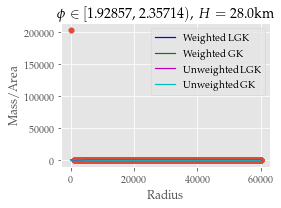

_______Phi:[1.92857,2.35714) __ H:29500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.01509643e+00 -7.46977792e-04  1.00201063e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


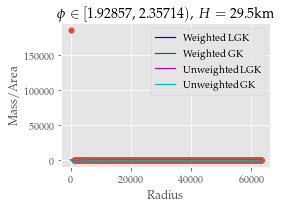

_______Phi:[1.92857,2.35714) __ H:31000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.00092728e+00 -7.21404023e-04  1.00012404e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


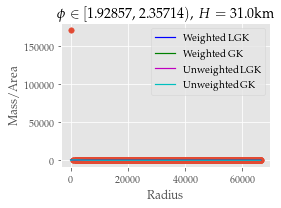

_______Phi:[1.92857,2.35714) __ H:32500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 9.87614238e-01 -6.98317314e-04  9.98354889e-01]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


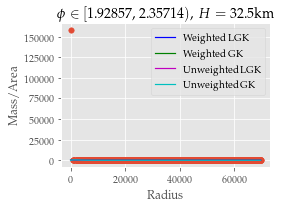

_______Phi:[1.92857,2.35714) __ H:34000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 9.75790355e-01 -6.78756400e-04  9.96784494e-01]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


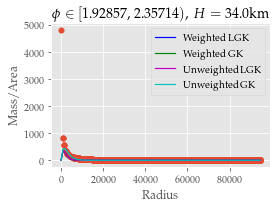

c:\users\nmostert\envs\spew\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in power
  """


_______Phi:[1.92857,2.35714) __ H:35500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 6.24240684e-03 -2.67749594e-04  5.76465164e+02]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


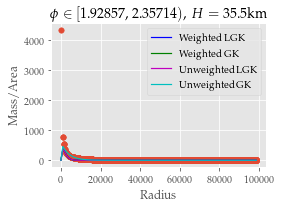

_______Phi:[1.92857,2.35714) __ H:37000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 9.51171551e-01 -6.37207325e-04  9.93526944e-01]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


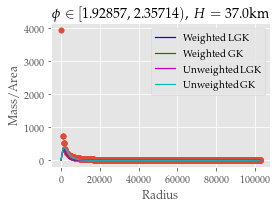

_______Phi:[1.92857,2.35714) __ H:38500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 9.39644980e-01 -6.18379812e-04  9.92006954e-01]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


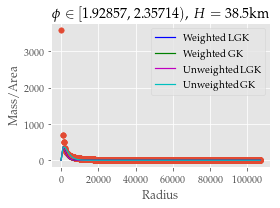

_______Phi:[1.92857,2.35714) __ H:40000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 9.28684318e-01 -6.00897681e-04  9.90565108e-01]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


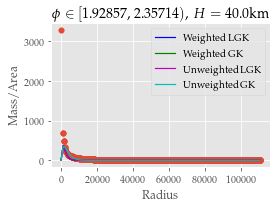

_______Phi:[2.35714,2.78571) __ H:10000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.17854761e+00 -1.13234541e-03  1.02391472e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


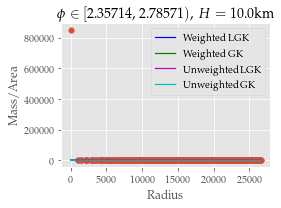

_______Phi:[2.35714,2.78571) __ H:11500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.14688252e+00 -1.07098406e-03  1.01968997e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


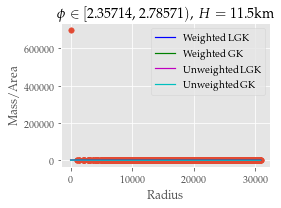

_______Phi:[2.35714,2.78571) __ H:13000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.11430139e+00 -9.97036453e-04  1.01521189e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


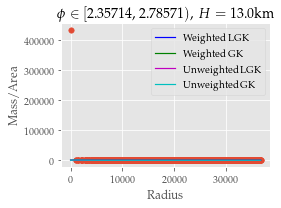

_______Phi:[2.35714,2.78571) __ H:14500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.08814476e+00 -9.46129057e-04  1.01180151e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


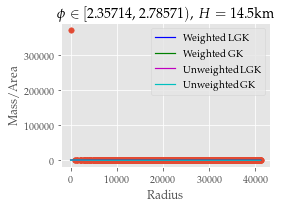

_______Phi:[2.35714,2.78571) __ H:16000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.06707007e+00 -9.09406996e-04  1.00900160e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


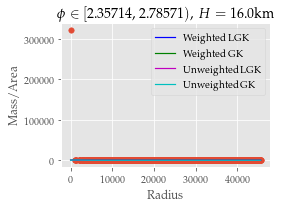

_______Phi:[2.35714,2.78571) __ H:17500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.04589431e+00 -8.70979723e-04  1.00611821e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


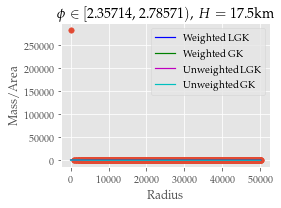

_______Phi:[2.35714,2.78571) __ H:19000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.02716958e+00 -8.38356621e-04  1.00362729e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


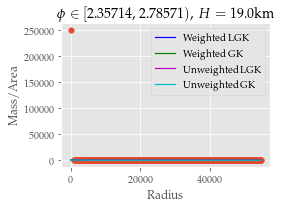

_______Phi:[2.35714,2.78571) __ H:20500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.00912472e+00 -8.07475278e-04  1.00122042e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


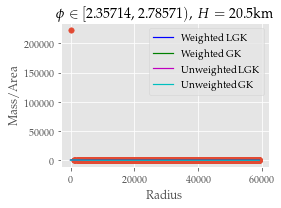

_______Phi:[2.35714,2.78571) __ H:22000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 9.93000406e-01 -7.81214866e-04  9.99063853e-01]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


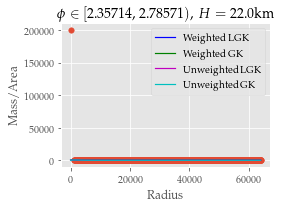

_______Phi:[2.35714,2.78571) __ H:23500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 9.76658320e-01 -7.53744645e-04  9.96896372e-01]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


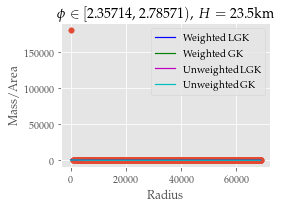

_______Phi:[2.35714,2.78571) __ H:25000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 9.60479129e-01 -7.26320139e-04  9.94747664e-01]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


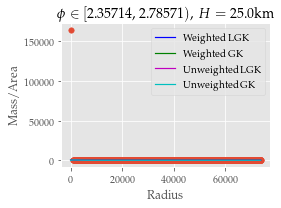

_______Phi:[2.35714,2.78571) __ H:26500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 9.45979050e-01 -7.03083068e-04  9.92819547e-01]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


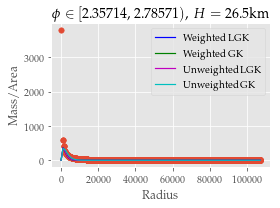

_______Phi:[2.35714,2.78571) __ H:28000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 9.31193327e-01 -6.78829161e-04  9.90877081e-01]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


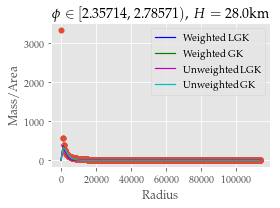

_______Phi:[2.35714,2.78571) __ H:29500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 9.17166344e-01 -6.56365896e-04  9.89056699e-01]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


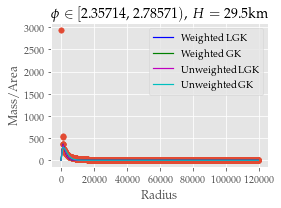

_______Phi:[2.35714,2.78571) __ H:31000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 9.04002868e-01 -6.35896883e-04  9.87392161e-01]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


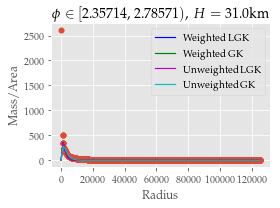

_______Phi:[2.35714,2.78571) __ H:32500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 8.91865904e-01 -6.17831275e-04  9.85968245e-01]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


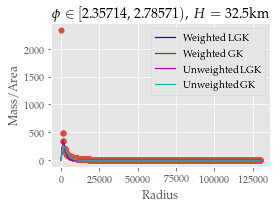

_______Phi:[2.35714,2.78571) __ H:34000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 6.15401201e-03 -2.68398292e-04  3.55497141e+02]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


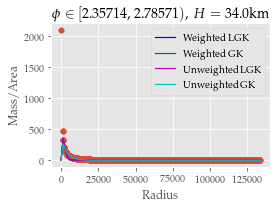

_______Phi:[2.35714,2.78571) __ H:35500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 8.71337159e-01 -5.89069611e-04  9.80211956e-01]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


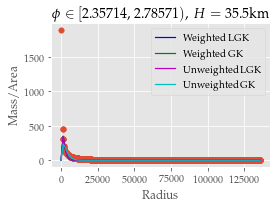

_______Phi:[2.35714,2.78571) __ H:37000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 8.62016500e-01 -5.77587332e-04  9.80922450e-01]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


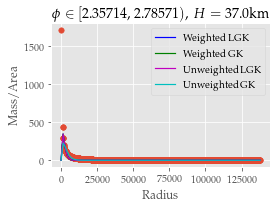

_______Phi:[2.35714,2.78571) __ H:38500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 8.53999741e-01 -5.68311474e-04  9.79756374e-01]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


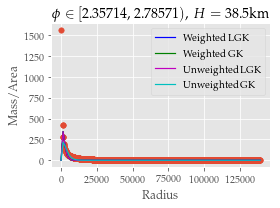

_______Phi:[2.35714,2.78571) __ H:40000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 8.46836553e-01 -5.60734474e-04  9.78649261e-01]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


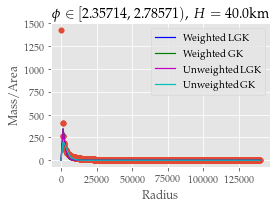

_______Phi:[2.78571,3.21429) __ H:10000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.06960717e+00 -9.96051637e-04  1.00943955e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


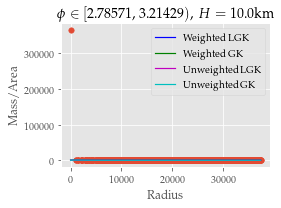

_______Phi:[2.78571,3.21429) __ H:11500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.03837563e+00 -9.38134275e-04  1.00511755e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


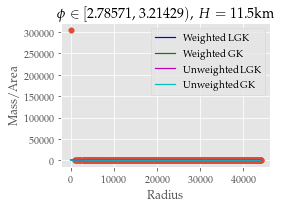

_______Phi:[2.78571,3.21429) __ H:13000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.01052862e+00 -8.88357704e-04  1.00142370e+00]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


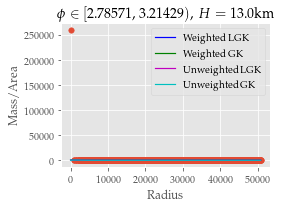

_______Phi:[2.78571,3.21429) __ H:14500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 9.86817323e-01 -8.49099108e-04  9.98238669e-01]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


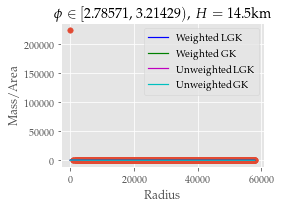

_______Phi:[2.78571,3.21429) __ H:16000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 9.66307336e-01 -8.17549988e-04  9.95414896e-01]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


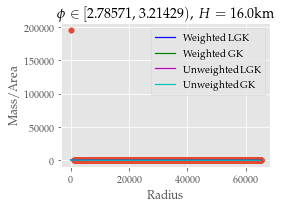

_______Phi:[2.78571,3.21429) __ H:17500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 9.45953225e-01 -7.85256212e-04  9.92624181e-01]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


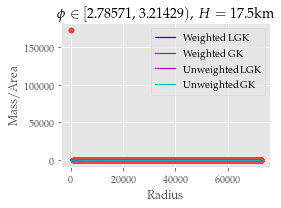

_______Phi:[2.78571,3.21429) __ H:19000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 9.26886518e-01 -7.55769878e-04  9.90732140e-01]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


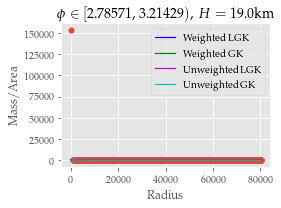

_______Phi:[2.78571,3.21429) __ H:20500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 9.09295743e-01 -7.28720680e-04  9.87754342e-01]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


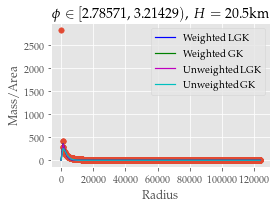

_______Phi:[2.78571,3.21429) __ H:22000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 8.92083914e-01 -7.02175396e-04  9.85033550e-01]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


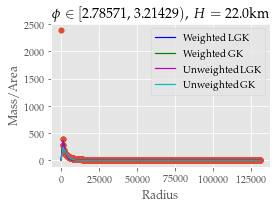

_______Phi:[2.78571,3.21429) __ H:23500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 8.76014295e-01 -6.78041837e-04  9.82482547e-01]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


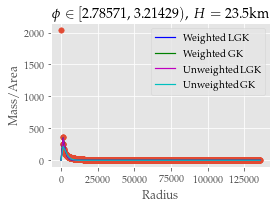

_______Phi:[2.78571,3.21429) __ H:25000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 8.61431290e-01 -6.57217942e-04  9.80162526e-01]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


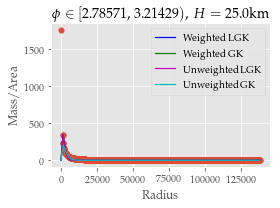

_______Phi:[2.78571,3.21429) __ H:26500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 8.48549194e-01 -6.40184146e-04  9.78112663e-01]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


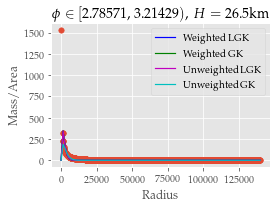

_______Phi:[2.78571,3.21429) __ H:28000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 8.37390769e-01 -6.26916517e-04  9.76337958e-01]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


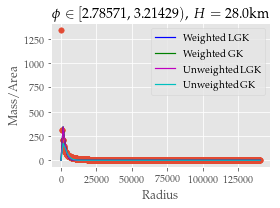

_______Phi:[2.78571,3.21429) __ H:29500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.91396862e-02 -2.88405551e-04  2.13509731e+02]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


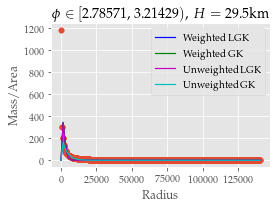

_______Phi:[2.78571,3.21429) __ H:31000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 8.19825496e-01 -6.10449768e-04  9.73549731e-01]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


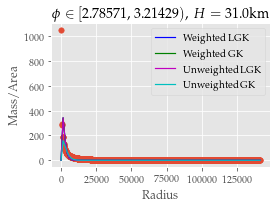

_______Phi:[2.78571,3.21429) __ H:32500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 1.15797396e-01 -2.90171047e-04  8.93033492e+01]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


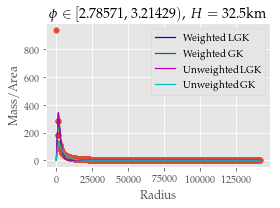

_______Phi:[2.78571,3.21429) __ H:34000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 8.07531742e-01 -6.04990321e-04  9.71611061e-01]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


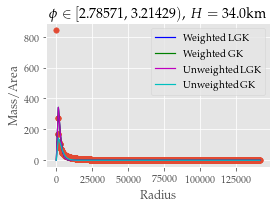

_______Phi:[2.78571,3.21429) __ H:35500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 8.02805797e-01 -6.05109286e-04  9.70841802e-01]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


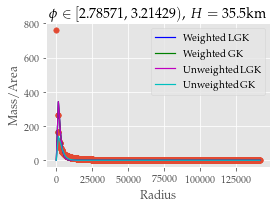

_______Phi:[2.78571,3.21429) __ H:37000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 7.98488981e-01 -6.05672335e-04  9.70141803e-01]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


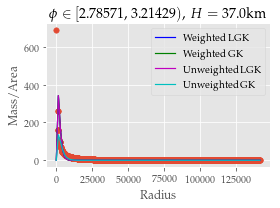

_______Phi:[2.78571,3.21429) __ H:38500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 7.94754744e-01 -6.07464149e-04  9.69531575e-01]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


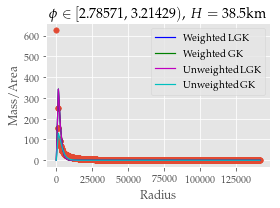

_______Phi:[2.78571,3.21429) __ H:40000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 7.91139100e-01 -6.09125050e-04  9.68929074e-01]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


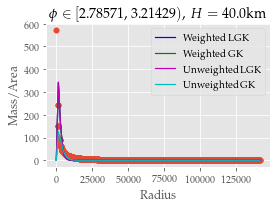

_______Phi:[3.21429,3.64286) __ H:10000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 0.99999953 -0.00107718  0.99999994]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


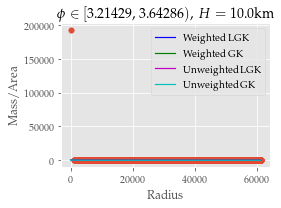

_______Phi:[3.21429,3.64286) __ H:11500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 0.99999901 -0.00114142  0.99999987]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


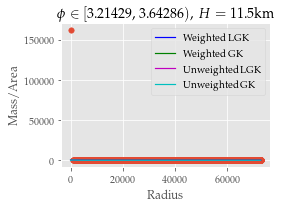

_______Phi:[3.21429,3.64286) __ H:13000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 0.99999857 -0.00120356  0.9999998 ]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


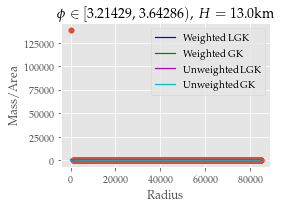

_______Phi:[3.21429,3.64286) __ H:14500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 8.72073922e-01 -7.83830420e-04  9.81327237e-01]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


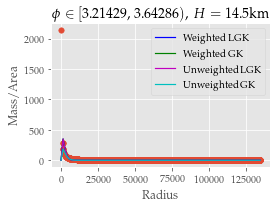

_______Phi:[3.21429,3.64286) __ H:16000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 8.49628280e-01 -7.50488213e-04  9.77714533e-01]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


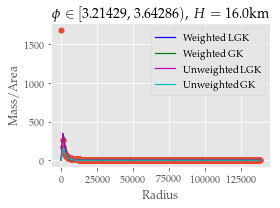

_______Phi:[3.21429,3.64286) __ H:17500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
uw_gk_params:[ 8.28842967e-01 -7.20147610e-04  9.74346847e-01]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


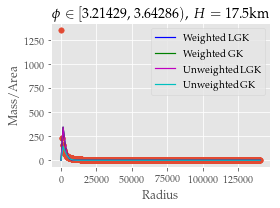

_______Phi:[3.21429,3.64286) __ H:19000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_gk_params:[ 0.99985786 -0.03791186  0.99998107]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


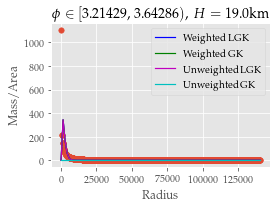

_______Phi:[3.21429,3.64286) __ H:20500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_gk_params:[ 0.99985816 -0.03793717  0.99998111]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


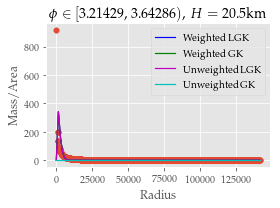

_______Phi:[3.21429,3.64286) __ H:22000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_gk_params:[ 0.99985851 -0.03795612  0.99998115]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


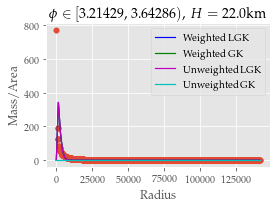

_______Phi:[3.21429,3.64286) __ H:23500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_gk_params:[ 0.99985888 -0.03797074  0.99998121]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


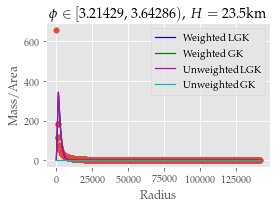

_______Phi:[3.21429,3.64286) __ H:25000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_gk_params:[ 0.99957797 -0.11188066  0.9999438 ]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


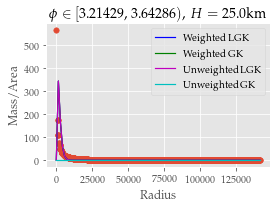

_______Phi:[3.21429,3.64286) __ H:26500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_gk_params:[ 0.99957903 -0.11188944  0.99994395]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


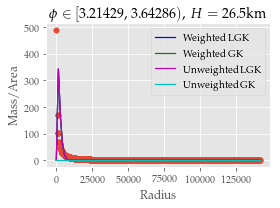

_______Phi:[3.21429,3.64286) __ H:28000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_gk_params:[ 0.99957995 -0.11189685  0.99994409]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


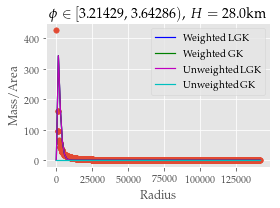

_______Phi:[3.21429,3.64286) __ H:29500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_gk_params:[ 0.99958072 -0.11190327  0.99994419]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


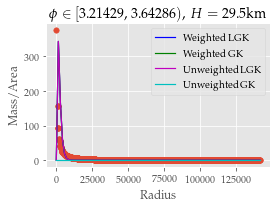

_______Phi:[3.21429,3.64286) __ H:31000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_gk_params:[ 0.99958133 -0.11190896  0.99994428]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


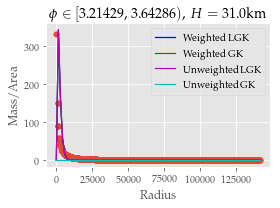

_______Phi:[3.21429,3.64286) __ H:32500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_gk_params:[ 0.99958179 -0.11191408  0.99994434]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


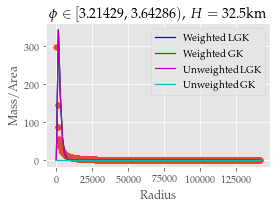

_______Phi:[3.21429,3.64286) __ H:34000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_gk_params:[ 0.99958213 -0.11191874  0.99994438]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


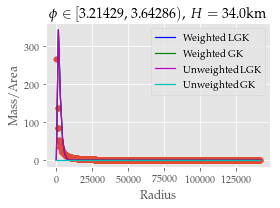

_______Phi:[3.21429,3.64286) __ H:35500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_gk_params:[ 0.99958236 -0.11192303  0.99994441]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


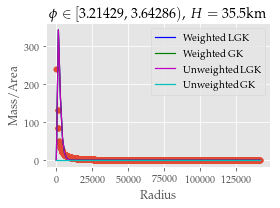

_______Phi:[3.21429,3.64286) __ H:37000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_gk_params:[ 0.99958249 -0.11192699  0.99994442]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


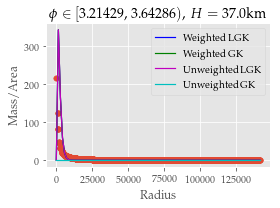

_______Phi:[3.21429,3.64286) __ H:38500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_gk_params:[ 0.99958254 -0.11193067  0.99994443]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


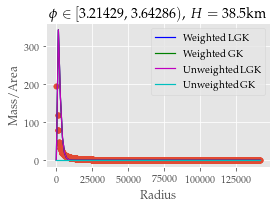

_______Phi:[3.21429,3.64286) __ H:40000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_gk_params:[ 0.99958254 -0.11193411  0.99994442]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


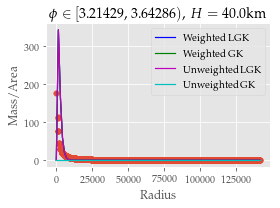

_______Phi:[3.64286,4.07143) __ H:10000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_gk_params:[ 0.99957927 -0.11189373  0.99994397]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


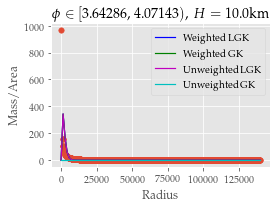

_______Phi:[3.64286,4.07143) __ H:11500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_gk_params:[ 0.99957954 -0.11191342  0.99994398]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


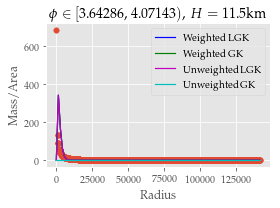

_______Phi:[3.64286,4.07143) __ H:13000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_gk_params:[ 0.99958022 -0.11192634  0.99994407]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


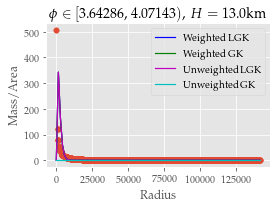

_______Phi:[3.64286,4.07143) __ H:14500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_gk_params:[ 0.99958112 -0.11193519  0.9999442 ]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


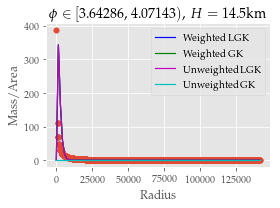

_______Phi:[3.64286,4.07143) __ H:16000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_gk_params:[ 0.99958198 -0.11194166  0.99994432]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


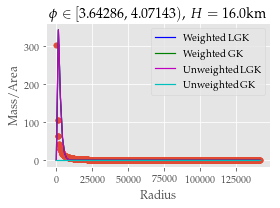

_______Phi:[3.64286,4.07143) __ H:17500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_gk_params:[ 0.99958269 -0.11194677  0.99994443]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


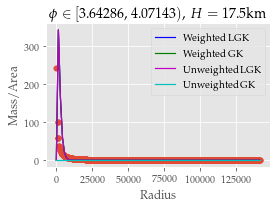

_______Phi:[3.64286,4.07143) __ H:19000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_gk_params:[ 0.99958319 -0.11195107  0.9999445 ]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


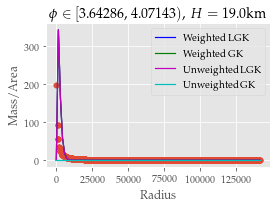

_______Phi:[3.64286,4.07143) __ H:20500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_gk_params:[ 0.9995835  -0.11195483  0.99994454]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


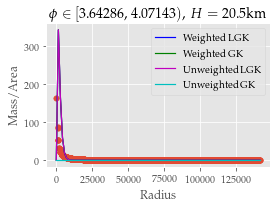

_______Phi:[3.64286,4.07143) __ H:22000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_gk_params:[ 0.99958365 -0.11195821  0.99994455]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


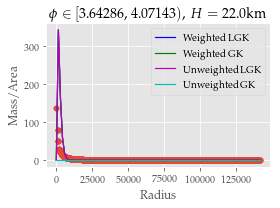

_______Phi:[3.64286,4.07143) __ H:23500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_gk_params:[ 0.99958368 -0.11196127  0.99994455]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


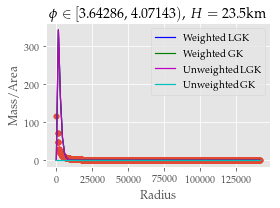

_______Phi:[3.64286,4.07143) __ H:25000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_gk_params:[ 0.99958361 -0.11196406  0.99994454]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


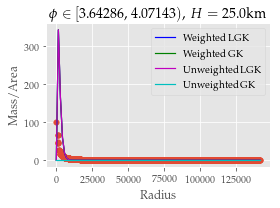

_______Phi:[3.64286,4.07143) __ H:26500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_gk_params:[ 0.99958349 -0.11196661  0.99994451]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


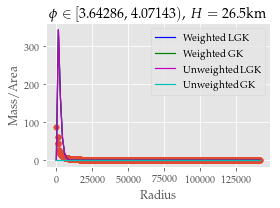

_______Phi:[3.64286,4.07143) __ H:28000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_gk_params:[ 0.99958333 -0.11196894  0.99994448]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


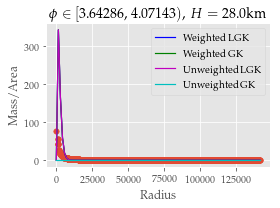

_______Phi:[3.64286,4.07143) __ H:29500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_gk_params:[ 0.99958315 -0.11197107  0.99994445]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


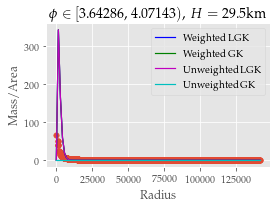

_______Phi:[3.64286,4.07143) __ H:31000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_gk_params:[ 0.99958296 -0.11197303  0.99994442]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


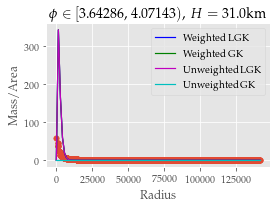

_______Phi:[3.64286,4.07143) __ H:32500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_gk_params:[ 0.99958277 -0.11197482  0.99994439]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


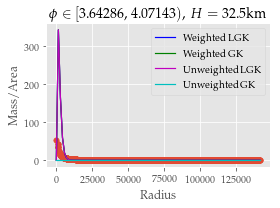

_______Phi:[3.64286,4.07143) __ H:34000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_gk_params:[ 0.99958259 -0.11197647  0.99994436]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


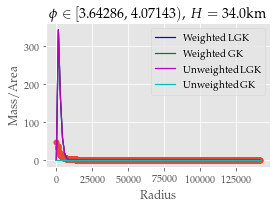

_______Phi:[3.64286,4.07143) __ H:35500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_gk_params:[ 0.99958241 -0.11197799  0.99994433]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


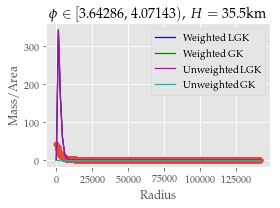

_______Phi:[3.64286,4.07143) __ H:37000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_gk_params:[ 0.99958225 -0.11197938  0.9999443 ]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


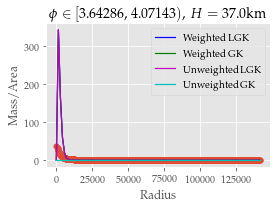

_______Phi:[3.64286,4.07143) __ H:38500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_gk_params:[ 0.99958211 -0.11198067  0.99994428]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


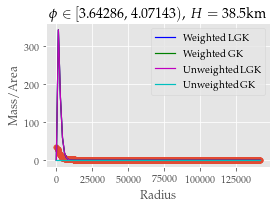

_______Phi:[3.64286,4.07143) __ H:40000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_gk_params:[ 0.99958198 -0.11198186  0.99994426]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


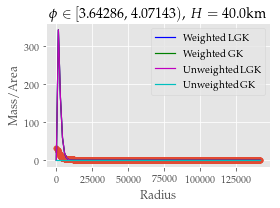

_______Phi:[4.07143,4.5) __ H:10000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_gk_params:[ 0.99958362 -0.11196962  0.99994453]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


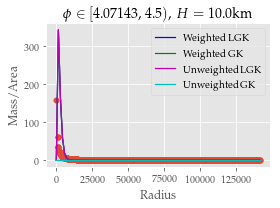

_______Phi:[4.07143,4.5) __ H:11500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_gk_params:[ 0.99958408 -0.11197323  0.9999446 ]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


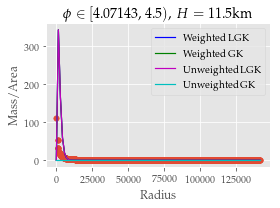

_______Phi:[4.07143,4.5) __ H:13000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_gk_params:[ 0.99958426 -0.11197624  0.99994462]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


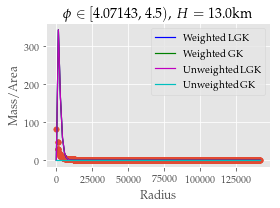

_______Phi:[4.07143,4.5) __ H:14500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_gk_params:[ 0.99958424 -0.11197886  0.99994461]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


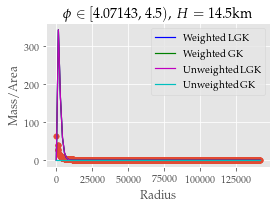

_______Phi:[4.07143,4.5) __ H:16000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_gk_params:[ 0.99958412 -0.11198115  0.99994459]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


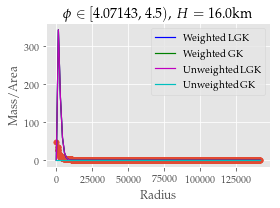

_______Phi:[4.07143,4.5) __ H:17500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_gk_params:[ 0.99958394 -0.11198315  0.99994456]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


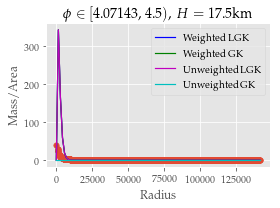

_______Phi:[4.07143,4.5) __ H:19000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_gk_params:[ 0.99958374 -0.11198489  0.99994452]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


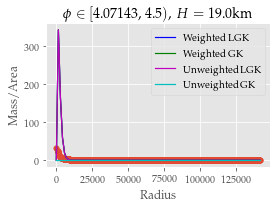

_______Phi:[4.07143,4.5) __ H:20500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_gk_params:[ 0.99958356 -0.11198642  0.99994449]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


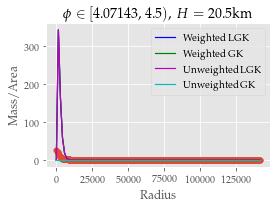

_______Phi:[4.07143,4.5) __ H:22000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_gk_params:[ 0.99958339 -0.11198775  0.99994446]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


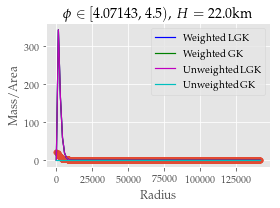

_______Phi:[4.07143,4.5) __ H:23500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_gk_params:[ 0.99958325 -0.11198892  0.99994444]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


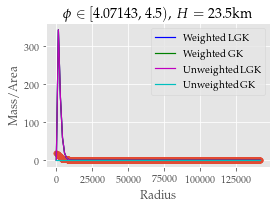

_______Phi:[4.07143,4.5) __ H:25000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_gk_params:[ 0.99958314 -0.11198995  0.99994442]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


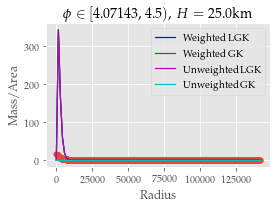

_______Phi:[4.07143,4.5) __ H:26500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_gk_params:[ 0.99958305 -0.11199085  0.99994441]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


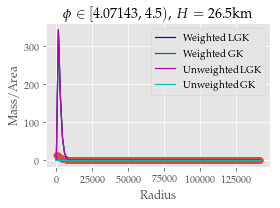

_______Phi:[4.07143,4.5) __ H:28000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_gk_params:[ 0.99958299 -0.11199164  0.9999444 ]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


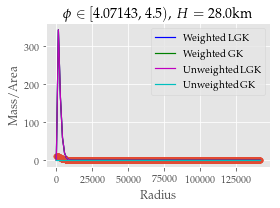

_______Phi:[4.07143,4.5) __ H:29500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_gk_params:[ 0.99958295 -0.11199234  0.99994439]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


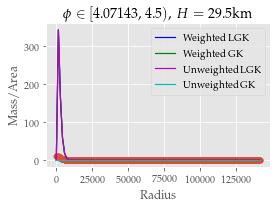

_______Phi:[4.07143,4.5) __ H:31000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_gk_params:[ 0.99958293 -0.11199296  0.99994439]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


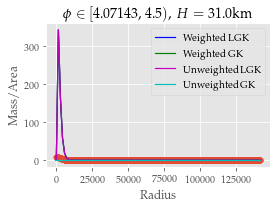

_______Phi:[4.07143,4.5) __ H:32500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_gk_params:[ 0.99958292 -0.1119935   0.99994439]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


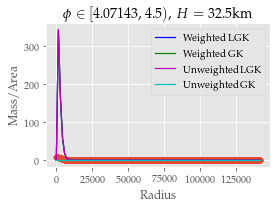

_______Phi:[4.07143,4.5) __ H:34000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_gk_params:[ 0.99958294 -0.11199398  0.99994439]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


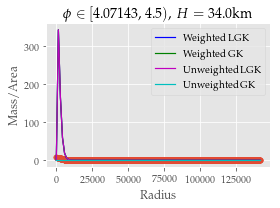

_______Phi:[4.07143,4.5) __ H:35500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_gk_params:[ 0.99958296 -0.11199441  0.99994439]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


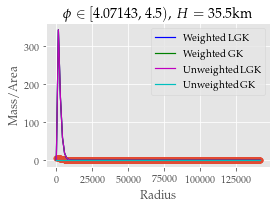

_______Phi:[4.07143,4.5) __ H:37000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_gk_params:[ 0.99958299 -0.11199479  0.9999444 ]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


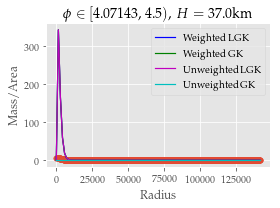

_______Phi:[4.07143,4.5) __ H:38500______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_gk_params:[ 0.99958303 -0.11199513  0.9999444 ]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


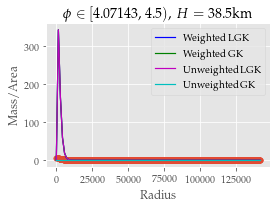

_______Phi:[4.07143,4.5) __ H:40000______
Weighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_gk_params:[ 1.    -0.001  1.   ]
Weighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
w_lgk_params:[ 1.    -0.001  1.   ]
Unweighted Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_gk_params:[ 0.99958307 -0.11199543  0.99994441]
Unweighted Log Gamma Kernel: True : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
uw_lgk_params:[ 1.    -0.001  1.   ]


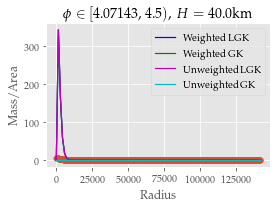

H                  Phi    a      b    c  \
0    10000      [-4.5,-4.07143)  1.0 -0.001  1.0   
1    11500      [-4.5,-4.07143)  1.0 -0.001  1.0   
2    13000      [-4.5,-4.07143)  1.0 -0.001  1.0   
3    14500      [-4.5,-4.07143)  1.0 -0.001  1.0   
4    16000      [-4.5,-4.07143)  1.0 -0.001  1.0   
5    17500      [-4.5,-4.07143)  1.0 -0.001  1.0   
6    19000      [-4.5,-4.07143)  1.0 -0.001  1.0   
7    20500      [-4.5,-4.07143)  1.0 -0.001  1.0   
8    22000      [-4.5,-4.07143)  1.0 -0.001  1.0   
9    23500      [-4.5,-4.07143)  1.0 -0.001  1.0   
10   25000      [-4.5,-4.07143)  1.0 -0.001  1.0   
11   26500      [-4.5,-4.07143)  1.0 -0.001  1.0   
12   28000      [-4.5,-4.07143)  1.0 -0.001  1.0   
13   29500      [-4.5,-4.07143)  1.0 -0.001  1.0   
14   31000      [-4.5,-4.07143)  1.0 -0.001  1.0   
15   32500      [-4.5,-4.07143)  1.0 -0.001  1.0   
16   34000      [-4.5,-4.07143)  1.0 -0.001  1.0   
17   35500      [-4.5,-4.07143)  1.0 -0.001  1.0   
18   37000      [-4.5,-4.07143)  1.0 -0.001  1.0   
19   38500      [-4.5,-4.07143)  1.0 -0.001  1.0   
20   40000      [-4.5,-4.07143)  1.0 -0.001  1.0   
21   10000  [-4.07143,-3.64286)  1.0 -0.001  1.0   
22   11500  [-4.07143,-3.64286)  1.0 -0.001  1.0   
23   13000  [-4.07143,-3.64286)  1.0 -0.001  1.0   
24   14500  [-4.07143,-3.64286)  1.0 -0.001  1.0   
25   16000  [-4.07143,-3.64286)  1.0 -0.001  1.0   
26   17500  [-4.07143,-3.64286)  1.0 -0.001  1.0   
27   19000  [-4.07143,-3.64286)  1.0 -0.001  1.0   
28   20500  [-4.07143,-3.64286)  1.0 -0.001  1.0   
29   22000  [-4.07143,-3.64286)  1.0 -0.001  1.0   
..     ...                  ...  ...    ...  ...   
411  28000    [3.64286,4.07143)  1.0 -0.001  1.0   
412  29500    [3.64286,4.07143)  1.0 -0.001  1.0   
413  31000    [3.64286,4.07143)  1.0 -0.001  1.0   
414  32500    [3.64286,4.07143)  1.0 -0.001  1.0   
415  34000    [3.64286,4.07143)  1.0 -0.001  1.0   
416  35500    [3.64286,4.07143)  1.0 -0.001  1.0   
417  37000    [3.64286,4.07143)  1.0 -0.001  1.0   
418  38500    [3.64286,4.07143)  1.0 -0.001  1.0   
419  40000    [3.64286,4.07143)  1.0 -0.001  1.0   
420  10000        [4.07143,4.5)  1.0 -0.001  1.0   
421  11500        [4.07143,4.5)  1.0 -0.001  1.0   
422  13000        [4.07143,4.5)  1.0 -0.001  1.0   
423  14500        [4.07143,4.5)  1.0 -0.001  1.0   
424  16000        [4.07143,4.5)  1.0 -0.001  1.0   
425  17500        [4.07143,4.5)  1.0 -0.001  1.0   
426  19000        [4.07143,4.5)  1.0 -0.001  1.0   
427  20500        [4.07143,4.5)  1.0 -0.001  1.0   
428  22000        [4.07143,4.5)  1.0 -0.001  1.0   
429  23500        [4.07143,4.5)  1.0 -0.001  1.0   
430  25000        [4.07143,4.5)  1.0 -0.001  1.0   
431  26500        [4.07143,4.5)  1.0 -0.001  1.0   
432  28000        [4.07143,4.5)  1.0 -0.001  1.0   
433  29500        [4.07143,4.5)  1.0 -0.001  1.0   
434  31000        [4.07143,4.5)  1.0 -0.001  1.0   
435  32500        [4.07143,4.5)  1.0 -0.001  1.0   
436  34000        [4.07143,4.5)  1.0 -0.001  1.0   
437  35500        [4.07143,4.5)  1.0 -0.001  1.0   
438  37000        [4.07143,4.5)  1.0 -0.001  1.0   
439  38500        [4.07143,4.5)  1.0 -0.001  1.0   
440  40000        [4.07143,4.5)  1.0 -0.001  1.0   

                                                  data  
0    ([0.0, 1000.0, 1000.0, 1414.213562373095, 1414...  
1    ([0.0, 1000.0, 1000.0, 1414.213562373095, 1414...  
2    ([0.0, 1000.0, 1000.0, 1414.213562373095, 1414...  
3    ([0.0, 1000.0, 1000.0, 1414.213562373095, 1414...  
4    ([0.0, 1000.0, 1000.0, 1414.213562373095, 1414...  
5    ([0.0, 1000.0, 1000.0, 1414.213562373095, 1414...  
6    ([0.0, 1000.0, 1000.0, 1414.213562373095, 1414...  
7    ([0.0, 1000.0, 1000.0, 1414.213562373095, 1414...  
8    ([0.0, 1000.0, 1000.0, 1414.213562373095, 1414...  
9    ([0.0, 1000.0, 1000.0, 1414.213562373095, 1414...  
10   ([0.0, 1000.0, 1000.0, 1414.213562373095, 1414...  
11   ([0.0, 1000.0, 1000.0, 1414.213562373095, 1414...  
12   ([0.0, 1000.0, 1000.0, 1414.2135623730

H                  Phi    a      b    c  \
0    10000      [-4.5,-4.07143)  1.0 -0.001  1.0   
1    11500      [-4.5,-4.07143)  1.0 -0.001  1.0   
2    13000      [-4.5,-4.07143)  1.0 -0.001  1.0   
3    14500      [-4.5,-4.07143)  1.0 -0.001  1.0   
4    16000      [-4.5,-4.07143)  1.0 -0.001  1.0   
5    17500      [-4.5,-4.07143)  1.0 -0.001  1.0   
6    19000      [-4.5,-4.07143)  1.0 -0.001  1.0   
7    20500      [-4.5,-4.07143)  1.0 -0.001  1.0   
8    22000      [-4.5,-4.07143)  1.0 -0.001  1.0   
9    23500      [-4.5,-4.07143)  1.0 -0.001  1.0   
10   25000      [-4.5,-4.07143)  1.0 -0.001  1.0   
11   26500      [-4.5,-4.07143)  1.0 -0.001  1.0   
12   28000      [-4.5,-4.07143)  1.0 -0.001  1.0   
13   29500      [-4.5,-4.07143)  1.0 -0.001  1.0   
14   31000      [-4.5,-4.07143)  1.0 -0.001  1.0   
15   32500      [-4.5,-4.07143)  1.0 -0.001  1.0   
16   34000      [-4.5,-4.07143)  1.0 -0.001  1.0   
17   35500      [-4.5,-4.07143)  1.0 -0.001  1.0   
18   37000      [-4.5,-4.07143)  1.0 -0.001  1.0   
19   38500      [-4.5,-4.07143)  1.0 -0.001  1.0   
20   40000      [-4.5,-4.07143)  1.0 -0.001  1.0   
21   10000  [-4.07143,-3.64286)  1.0 -0.001  1.0   
22   11500  [-4.07143,-3.64286)  1.0 -0.001  1.0   
23   13000  [-4.07143,-3.64286)  1.0 -0.001  1.0   
24   14500  [-4.07143,-3.64286)  1.0 -0.001  1.0   
25   16000  [-4.07143,-3.64286)  1.0 -0.001  1.0   
26   17500  [-4.07143,-3.64286)  1.0 -0.001  1.0   
27   19000  [-4.07143,-3.64286)  1.0 -0.001  1.0   
28   20500  [-4.07143,-3.64286)  1.0 -0.001  1.0   
29   22000  [-4.07143,-3.64286)  1.0 -0.001  1.0   
..     ...                  ...  ...    ...  ...   
411  28000    [3.64286,4.07143)  1.0 -0.001  1.0   
412  29500    [3.64286,4.07143)  1.0 -0.001  1.0   
413  31000    [3.64286,4.07143)  1.0 -0.001  1.0   
414  32500    [3.64286,4.07143)  1.0 -0.001  1.0   
415  34000    [3.64286,4.07143)  1.0 -0.001  1.0   
416  35500    [3.64286,4.07143)  1.0 -0.001  1.0   
417  37000    [3.64286,4.07143)  1.0 -0.001  1.0   
418  38500    [3.64286,4.07143)  1.0 -0.001  1.0   
419  40000    [3.64286,4.07143)  1.0 -0.001  1.0   
420  10000        [4.07143,4.5)  1.0 -0.001  1.0   
421  11500        [4.07143,4.5)  1.0 -0.001  1.0   
422  13000        [4.07143,4.5)  1.0 -0.001  1.0   
423  14500        [4.07143,4.5)  1.0 -0.001  1.0   
424  16000        [4.07143,4.5)  1.0 -0.001  1.0   
425  17500        [4.07143,4.5)  1.0 -0.001  1.0   
426  19000        [4.07143,4.5)  1.0 -0.001  1.0   
427  20500        [4.07143,4.5)  1.0 -0.001  1.0   
428  22000        [4.07143,4.5)  1.0 -0.001  1.0   
429  23500        [4.07143,4.5)  1.0 -0.001  1.0   
430  25000        [4.07143,4.5)  1.0 -0.001  1.0   
431  26500        [4.07143,4.5)  1.0 -0.001  1.0   
432  28000        [4.07143,4.5)  1.0 -0.001  1.0   
433  29500        [4.07143,4.5)  1.0 -0.001  1.0   
434  31000        [4.07143,4.5)  1.0 -0.001  1.0   
435  32500        [4.07143,4.5)  1.0 -0.001  1.0   
436  34000        [4.07143,4.5)  1.0 -0.001  1.0   
437  35500        [4.07143,4.5)  1.0 -0.001  1.0   
438  37000        [4.07143,4.5)  1.0 -0.001  1.0   
439  38500        [4.07143,4.5)  1.0 -0.001  1.0   
440  40000        [4.07143,4.5)  1.0 -0.001  1.0   

                                                  data  
0    ([0.0, 1000.0, 1000.0, 1414.213562373095, 1414...  
1    ([0.0, 1000.0, 1000.0, 1414.213562373095, 1414...  
2    ([0.0, 1000.0, 1000.0, 1414.213562373095, 1414...  
3    ([0.0, 1000.0, 1000.0, 1414.213562373095, 1414...  
4    ([0.0, 1000.0, 1000.0, 1414.213562373095, 1414...  
5    ([0.0, 1000.0, 1000.0, 1414.213562373095, 1414...  
6    ([0.0, 1000.0, 1000.0, 1414.213562373095, 1414...  
7    ([0.0, 1000.0, 1000.0, 1414.213562373095, 1414...  
8    ([0.0, 1000.0, 1000.0, 1414.213562373095, 1414...  
9    ([0.0, 1000.0, 1000.0, 1414.213562373095, 1414...  
10   ([0.0, 1000.0, 1000.0, 1414.213562373095, 1414...  
11   ([0.0, 1000.0, 1000.0, 1414.213562373095, 1414...  
12   ([0.0, 1000.0, 1000.0, 1414.2135623730

H                  Phi         a         b         c  \
0    10000      [-4.5,-4.07143)  0.999549 -0.111918  0.999940   
1    11500      [-4.5,-4.07143)  0.999604 -0.111881  0.999948   
2    13000      [-4.5,-4.07143)  0.999874 -0.037949  0.999984   
3    14500      [-4.5,-4.07143)  0.999880 -0.037924  0.999984   
4    16000      [-4.5,-4.07143)  0.999963 -0.001449  0.999995   
5    17500      [-4.5,-4.07143)  0.999964 -0.001417  0.999995   
6    19000      [-4.5,-4.07143)  1.000002 -0.001393  1.000000   
7    20500      [-4.5,-4.07143)  1.000002 -0.001377  1.000000   
8    22000      [-4.5,-4.07143)  1.000002 -0.001364  1.000000   
9    23500      [-4.5,-4.07143)  1.000002 -0.001354  1.000000   
10   25000      [-4.5,-4.07143)  1.000002 -0.001346  1.000000   
11   26500      [-4.5,-4.07143)  1.000001 -0.001343  1.000000   
12   28000      [-4.5,-4.07143)  1.000001 -0.001342  1.000000   
13   29500      [-4.5,-4.07143)  1.000001 -0.001341  1.000000   
14   31000      [-4.5,-4.07143)  1.000001 -0.001338  1.000000   
15   32500      [-4.5,-4.07143)  1.000001 -0.001343  1.000000   
16   34000      [-4.5,-4.07143)  1.000001 -0.001344  1.000000   
17   35500      [-4.5,-4.07143)  1.000001 -0.001347  1.000000   
18   37000      [-4.5,-4.07143)  1.000001 -0.001349  1.000000   
19   38500      [-4.5,-4.07143)  1.000001 -0.001352  1.000000   
20   40000      [-4.5,-4.07143)  1.000001 -0.001359  1.000000   
21   10000  [-4.07143,-3.64286)  1.000002 -0.001428  1.000000   
22   11500  [-4.07143,-3.64286)  1.000001 -0.001316  1.000000   
23   13000  [-4.07143,-3.64286)  1.000001 -0.001242  1.000000   
24   14500  [-4.07143,-3.64286)  1.000001 -0.001202  1.000000   
25   16000  [-4.07143,-3.64286)  1.000001 -0.001168  1.000000   
26   17500  [-4.07143,-3.64286)  1.000001 -0.001144  1.000000   
27   19000  [-4.07143,-3.64286)  1.000001 -0.001127  1.000000   
28   20500  [-4.07143,-3.64286)  1.000001 -0.001112  1.000000   
29   22000  [-4.07143,-3.64286)  1.000001 -0.001100  1.000000   
..     ...                  ...       ...       ...       ...   
411  28000    [3.64286,4.07143)  0.999583 -0.111969  0.999944   
412  29500    [3.64286,4.07143)  0.999583 -0.111971  0.999944   
413  31000    [3.64286,4.07143)  0.999583 -0.111973  0.999944   
414  32500    [3.64286,4.07143)  0.999583 -0.111975  0.999944   
415  34000    [3.64286,4.07143)  0.999583 -0.111976  0.999944   
416  35500    [3.64286,4.07143)  0.999582 -0.111978  0.999944   
417  37000    [3.64286,4.07143)  0.999582 -0.111979  0.999944   
418  38500    [3.64286,4.07143)  0.999582 -0.111981  0.999944   
419  40000    [3.64286,4.07143)  0.999582 -0.111982  0.999944   
420  10000        [4.07143,4.5)  0.999584 -0.111970  0.999945   
421  11500        [4.07143,4.5)  0.999584 -0.111973  0.999945   
422  13000        [4.07143,4.5)  0.999584 -0.111976  0.999945   
423  14500        [4.07143,4.5)  0.999584 -0.111979  0.999945   
424  16000        [4.07143,4.5)  0.999584 -0.111981  0.999945   
425  17500        [4.07143,4.5)  0.999584 -0.111983  0.999945   
426  19000        [4.07143,4.5)  0.999584 -0.111985  0.999945   
427  20500        [4.07143,4.5)  0.999584 -0.111986  0.999944   
428  22000        [4.07143,4.5)  0.999583 -0.111988  0.999944   
429  23500        [4.07143,4.5)  0.999583 -0.111989  0.999944   
430  25000        [4.07143,4.5)  0.999583 -0.111990  0.999944   
431  26500        [4.07143,4.5)  0.999583 -0.111991  0.999944   
432  28000        [4.07143,4.5)  0.999583 -0.111992  0.999944   
433  29500        [4.07143,4.5)  0.999583 -0.111992  0.999944   
434  31000        [4.07143,4.5)  0.999583 -0.111993  0.999944   
435  32500        [4.07143,4.5)  0.999583 -0.111994  0.999944   
436  34000        [4.07143,4.5)  0.999583 -0.111994  0.999944   
437  35500        [4.07143,4.5)  0.999583 -0.111994  0.999944   
438  37000        [4.07143,4.5)  0.999583 -0.111995  0.999944   
439  38500        [4.07143,4.5)  0.999583 -0.111995  0.999944   
440  40000        [4.07143,4.5)  0.999583 -0

H                  Phi    a      b    c  \
0    10000      [-4.5,-4.07143)  1.0 -0.001  1.0   
1    11500      [-4.5,-4.07143)  1.0 -0.001  1.0   
2    13000      [-4.5,-4.07143)  1.0 -0.001  1.0   
3    14500      [-4.5,-4.07143)  1.0 -0.001  1.0   
4    16000      [-4.5,-4.07143)  1.0 -0.001  1.0   
5    17500      [-4.5,-4.07143)  1.0 -0.001  1.0   
6    19000      [-4.5,-4.07143)  1.0 -0.001  1.0   
7    20500      [-4.5,-4.07143)  1.0 -0.001  1.0   
8    22000      [-4.5,-4.07143)  1.0 -0.001  1.0   
9    23500      [-4.5,-4.07143)  1.0 -0.001  1.0   
10   25000      [-4.5,-4.07143)  1.0 -0.001  1.0   
11   26500      [-4.5,-4.07143)  1.0 -0.001  1.0   
12   28000      [-4.5,-4.07143)  1.0 -0.001  1.0   
13   29500      [-4.5,-4.07143)  1.0 -0.001  1.0   
14   31000      [-4.5,-4.07143)  1.0 -0.001  1.0   
15   32500      [-4.5,-4.07143)  1.0 -0.001  1.0   
16   34000      [-4.5,-4.07143)  1.0 -0.001  1.0   
17   35500      [-4.5,-4.07143)  1.0 -0.001  1.0   
18   37000      [-4.5,-4.07143)  1.0 -0.001  1.0   
19   38500      [-4.5,-4.07143)  1.0 -0.001  1.0   
20   40000      [-4.5,-4.07143)  1.0 -0.001  1.0   
21   10000  [-4.07143,-3.64286)  1.0 -0.001  1.0   
22   11500  [-4.07143,-3.64286)  1.0 -0.001  1.0   
23   13000  [-4.07143,-3.64286)  1.0 -0.001  1.0   
24   14500  [-4.07143,-3.64286)  1.0 -0.001  1.0   
25   16000  [-4.07143,-3.64286)  1.0 -0.001  1.0   
26   17500  [-4.07143,-3.64286)  1.0 -0.001  1.0   
27   19000  [-4.07143,-3.64286)  1.0 -0.001  1.0   
28   20500  [-4.07143,-3.64286)  1.0 -0.001  1.0   
29   22000  [-4.07143,-3.64286)  1.0 -0.001  1.0   
..     ...                  ...  ...    ...  ...   
411  28000    [3.64286,4.07143)  1.0 -0.001  1.0   
412  29500    [3.64286,4.07143)  1.0 -0.001  1.0   
413  31000    [3.64286,4.07143)  1.0 -0.001  1.0   
414  32500    [3.64286,4.07143)  1.0 -0.001  1.0   
415  34000    [3.64286,4.07143)  1.0 -0.001  1.0   
416  35500    [3.64286,4.07143)  1.0 -0.001  1.0   
417  37000    [3.64286,4.07143)  1.0 -0.001  1.0   
418  38500    [3.64286,4.07143)  1.0 -0.001  1.0   
419  40000    [3.64286,4.07143)  1.0 -0.001  1.0   
420  10000        [4.07143,4.5)  1.0 -0.001  1.0   
421  11500        [4.07143,4.5)  1.0 -0.001  1.0   
422  13000        [4.07143,4.5)  1.0 -0.001  1.0   
423  14500        [4.07143,4.5)  1.0 -0.001  1.0   
424  16000        [4.07143,4.5)  1.0 -0.001  1.0   
425  17500        [4.07143,4.5)  1.0 -0.001  1.0   
426  19000        [4.07143,4.5)  1.0 -0.001  1.0   
427  20500        [4.07143,4.5)  1.0 -0.001  1.0   
428  22000        [4.07143,4.5)  1.0 -0.001  1.0   
429  23500        [4.07143,4.5)  1.0 -0.001  1.0   
430  25000        [4.07143,4.5)  1.0 -0.001  1.0   
431  26500        [4.07143,4.5)  1.0 -0.001  1.0   
432  28000        [4.07143,4.5)  1.0 -0.001  1.0   
433  29500        [4.07143,4.5)  1.0 -0.001  1.0   
434  31000        [4.07143,4.5)  1.0 -0.001  1.0   
435  32500        [4.07143,4.5)  1.0 -0.001  1.0   
436  34000        [4.07143,4.5)  1.0 -0.001  1.0   
437  35500        [4.07143,4.5)  1.0 -0.001  1.0   
438  37000        [4.07143,4.5)  1.0 -0.001  1.0   
439  38500        [4.07143,4.5)  1.0 -0.001  1.0   
440  40000        [4.07143,4.5)  1.0 -0.001  1.0   

                                                  data  
0    ([0.0, 1000.0, 1000.0, 1414.213562373095, 1414...  
1    ([0.0, 1000.0, 1000.0, 1414.213562373095, 1414...  
2    ([0.0, 1000.0, 1000.0, 1414.213562373095, 1414...  
3    ([0.0, 1000.0, 1000.0, 1414.213562373095, 1414...  
4    ([0.0, 1000.0, 1000.0, 1414.213562373095, 1414...  
5    ([0.0, 1000.0, 1000.0, 1414.213562373095, 1414...  
6    ([0.0, 1000.0, 1000.0, 1414.213562373095, 1414...  
7    ([0.0, 1000.0, 1000.0, 1414.213562373095, 1414...  
8    ([0.0, 1000.0, 1000.0, 1414.213562373095, 1414...  
9    ([0.0, 1000.0, 1000.0, 1414.213562373095, 1414...  
10   ([0.0, 1000.0, 1000.0, 1414.213562373095, 1414...  
11   ([0.0, 1000.0, 1000.0, 1414.213562373095, 1414...  
12   ([0.0, 1000.0, 1000.0, 1414.2135623730

In [29]:
def log_gamma_kernel(x, a, b, c):
    return np.log(c) + (a*np.log(x)) + (b * x)

def gamma_kernel(x, a, b, c):
    return c*(x**a)*np.exp(b*x)


def w_lgk_sse(k, x_data, y_data):
    return sum(((1e9/(x_data**2))*(np.log(y_data) - (log_gamma_kernel(x_data, *k))) ** 2))

def w_gk_sse(k, x_data, y_data):
    return sum(((1e9/(x_data**2))*(y_data - (gamma_kernel(x_data, *k))) ** 2))

def uw_lgk_sse(k, x_data, y_data):
    return sum((np.log(y_data) - (log_gamma_kernel(x_data, *k))) ** 2)

def uw_gk_sse(k, x_data, y_data):
    return sum((y_data - (gamma_kernel(x_data, *k))) ** 2)


w_gk_df = pd.DataFrame(columns=['H', 'Phi', 'a', 'b', 'c', 'data'])
w_lgk_df = pd.DataFrame(columns=['H', 'Phi', 'a', 'b', 'c', 'data'])
uw_gk_df = pd.DataFrame(columns=['H', 'Phi', 'a', 'b', 'c', 'data'])
uw_lgk_df = pd.DataFrame(columns=['H', 'Phi', 'a', 'b', 'c', 'data'])




for k, phi in enumerate(phis):
#     fig, axs = plt.subplots(rows, 2, figsize=(
#         20, 15), facecolor='w', edgecolor='k')
#     axs = axs.ravel()
    for i, (h, erp) in enumerate(eruptions.items()):
        new_df = erp.df
        ma = new_df['MassArea'].values
        wt = new_df[phi].values
        xx = new_df['radius'].values
        yy = ma * (wt / 100)

        pnts = list(set(zip(xx, yy)))
        pnts = sorted(pnts, key=lambda x: x[0])

        x = np.array([p[0] for p in pnts], dtype=np.float64)
        y = np.array([p[1] for p in pnts], dtype=np.float64)

        tot_mass = np.trapz(y, x=x)
        idx = 0
        perc = 0.0
        while perc < 99.999:
            mass = np.trapz(y[:idx], x=x[:idx])
            idx += 1
            perc = (mass / tot_mass) * 100

        x_data = x[:idx]
        y_data = y[:idx]

        k0 = np.array([1, -1e-3, 1], dtype=np.float64)

        def w_gk_fun(k): return w_gk_sse(k, x_data, y_data)
        
        def w_lgk_fun(k): return w_lgk_sse(k, x_data, y_data)
        
        def uw_gk_fun(k): return uw_gk_sse(k, x_data, y_data)
        
        def uw_lgk_fun(k): return uw_lgk_sse(k, x_data, y_data)
        
        w_gk_bounds = [(None, None),(None, -1e-7), (None, None)]
        w_lgk_bounds = [(None, None),(None, -1e-7), (None, None)]
        uw_gk_bounds = [(None, None),(None, -1e-7), (None, None)]
        uw_lgk_bounds = [(None, None),(None, -1e-7), (None, None)]
        
        w_gk_popt = minimize(w_gk_fun, k0, bounds=w_gk_bounds, method='L-BFGS-B')
        w_lgk_popt = minimize(w_lgk_fun, k0, bounds=w_lgk_bounds, method='L-BFGS-B')
        uw_gk_popt = minimize(uw_gk_fun, k0, bounds=uw_gk_bounds, method='L-BFGS-B')
        uw_lgk_popt = minimize(uw_lgk_fun, k0, bounds=uw_lgk_bounds, method='L-BFGS-B')
        print("_______Phi:" + str(phi) + " __ H:" + str(h) + "______")
        print("Weighted Gamma Kernel: " + str(w_gk_popt.success) + " : " + str(w_gk_popt.message))
        print("w_gk_params:" + str(w_gk_popt.x))
        print("Weighted Log Gamma Kernel: " + str(w_lgk_popt.success) + " : " + str(w_lgk_popt.message))
        print("w_lgk_params:" + str(w_lgk_popt.x))
        print("Unweighted Gamma Kernel: " + str(uw_gk_popt.success) + " : " + str(uw_gk_popt.message))
        print("uw_gk_params:" + str(uw_gk_popt.x))
        print("Unweighted Log Gamma Kernel: " + str(uw_lgk_popt.success) + " : " + str(uw_lgk_popt.message))
        print("uw_lgk_params:" + str(uw_lgk_popt.x))
        
        xf = np.linspace(0, x_data.max(), 100)
        w_gk_yf = gamma_kernel(xf, *w_gk_popt.x)
        w_lgk_yf = log_gamma_kernel(xf, *w_lgk_popt.x)
        uw_gk_yf = gamma_kernel(xf, *uw_gk_popt.x)
        uw_lgk_yf = log_gamma_kernel(xf, *uw_lgk_popt.x)

#         if (phi in phis[-2:] and h in vals[::2]):
        fig, ax1 = plt.subplots(1, 1, figsize=(4, 3))

        ax1.scatter(x_data, y_data, s=30)
        ax1.plot(xf, np.exp(w_lgk_yf), 'b-', lw=1.2, label="Weighted LGK")
        ax1.plot(xf, w_gk_yf, 'g-', lw=1.2, label="Weighted GK")
        ax1.plot(xf, np.exp(uw_lgk_yf), 'm-', lw=1.2, label="Unweighted LGK")
        ax1.plot(xf, uw_gk_yf, 'c-', lw=1.2, label="Unweighted GK")
#         ax2.scatter(np.log(x_data), np.log(y_data), s=30)
#         ax2.plot(np.log(xf), w_lgk_yf, 'b-', lw=1.2, label="w lgk")
#         ax2.plot(np.log(xf), np.log(w_gk_yf), 'g-', lw=1.2, label="w gk")
#         ax2.plot(np.log(xf), uw_lgk_yf, 'm-', lw=1.2, label="uw lgk")
#         ax2.plot(np.log(xf), np.log(uw_gk_yf), 'c-', lw=1.2, label="uw gk")
        plt.legend()
        ax1.set_ylabel('Mass/Area')
        ax1.set_xlabel(r'Radius')
        plt.title(r'$\phi \in %s,\:H=%s$km' % (str(phi), disp_func(h)), fontsize=14)
        w_gk_df = w_gk_df.append(
            {'H': h, 'Phi': phi, 'a': w_gk_popt.x[0], 'b': w_gk_popt.x[1], 'c': w_gk_popt.x[2], 'data': (x_data, y_data)}, ignore_index=True)
        w_lgk_df = w_lgk_df.append(
            {'H': h, 'Phi': phi, 'a': w_lgk_popt.x[0], 'b': w_lgk_popt.x[1], 'c': w_lgk_popt.x[2], 'data': (x_data, y_data)}, ignore_index=True)
        uw_gk_df = uw_gk_df.append(
            {'H': h, 'Phi': phi, 'a': uw_gk_popt.x[0], 'b': uw_gk_popt.x[1], 'c': uw_gk_popt.x[2], 'data': (x_data, y_data)}, ignore_index=True)
        uw_lgk_df = uw_lgk_df.append(
            {'H': h, 'Phi': phi, 'a': uw_lgk_popt.x[0], 'b': uw_lgk_popt.x[1], 'c': uw_lgk_popt.x[2], 'data': (x_data, y_data)}, ignore_index=True)
        plt.tight_layout()
        plt.savefig("../../data/%s_trial_%d/phi%s_H%skm.png" %
                (param, trial, phi, disp_func(h)), dpi=200, format='png')
        plt.show()
display(w_gk_df)
display(w_lgk_df)
display(uw_gk_df)
display(uw_lgk_df)

Weighted Gamma Kernel


c:\users\nmostert\envs\spew\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Weighted Log-Gamma Kernel
Unweighted Gamma Kernel
Unweighted Log-Gamma Kernel


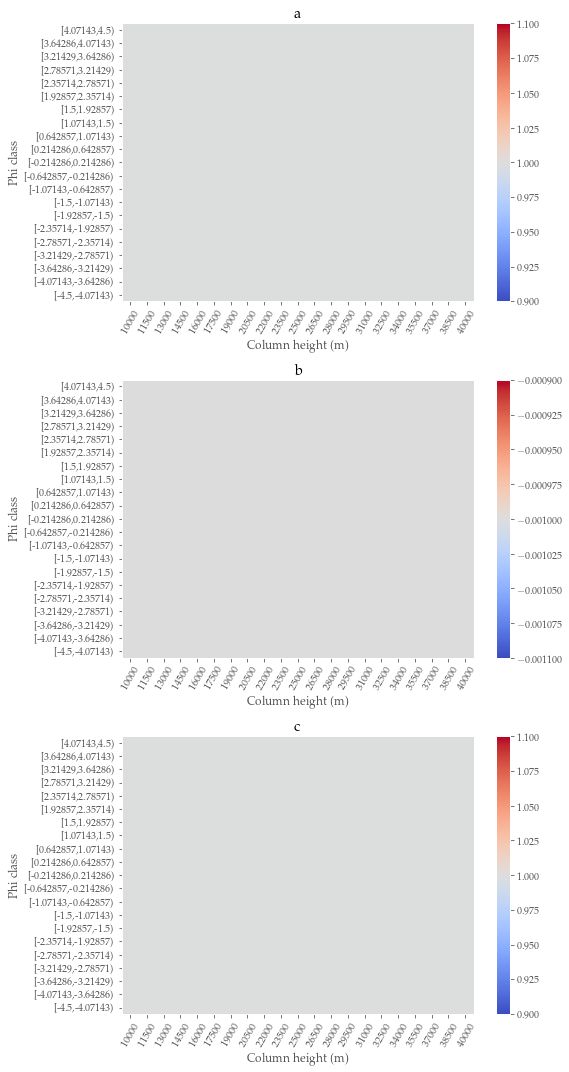

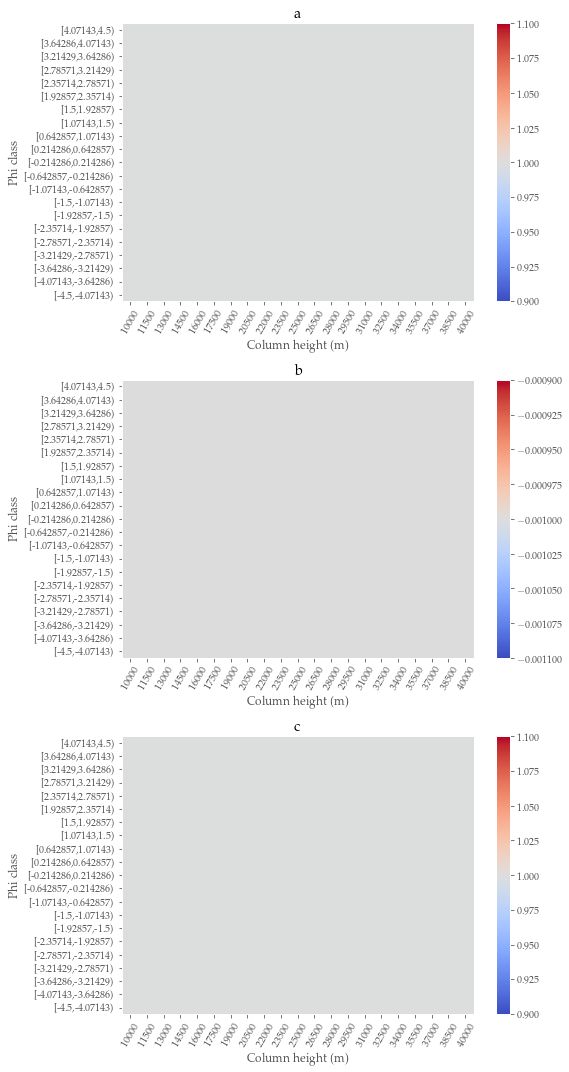

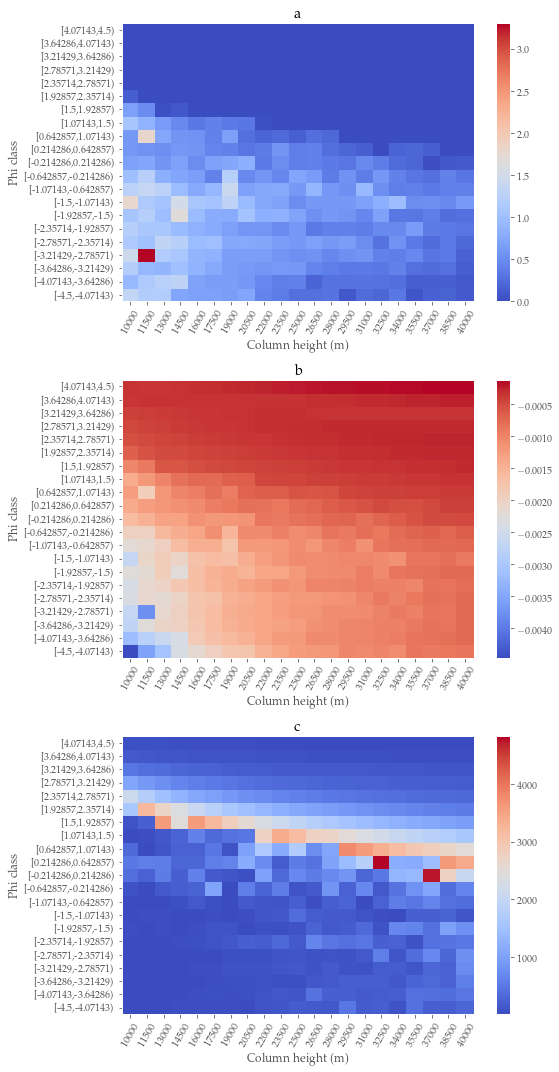

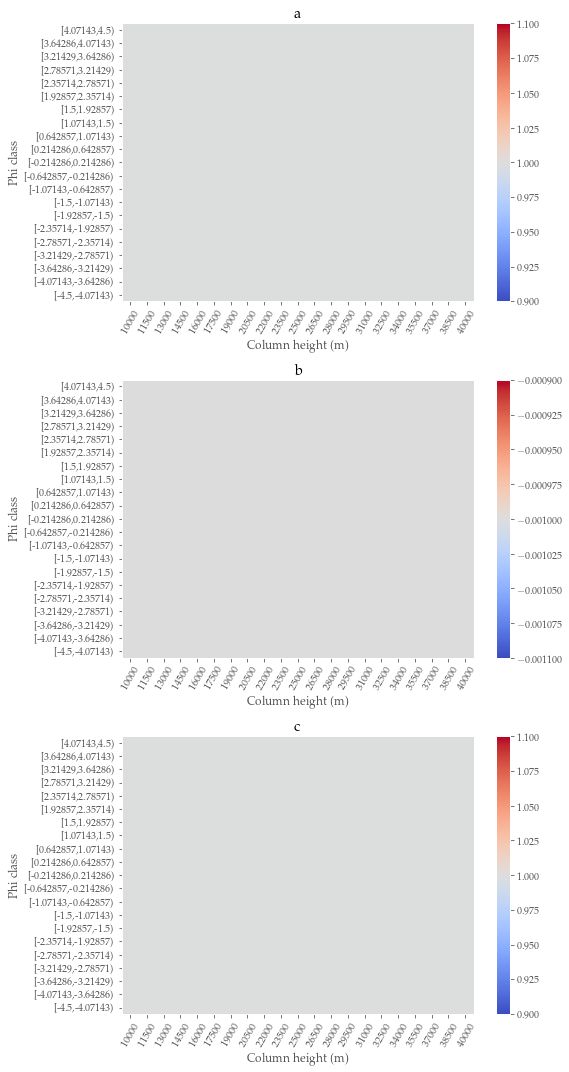

In [28]:
for df, tit in zip([w_gk_df, w_lgk_df, uw_gk_df, uw_lgk_df], ["Weighted Gamma Kernel", "Weighted Log-Gamma Kernel", "Unweighted Gamma Kernel", "Unweighted Log-Gamma Kernel"]):
    a_piv = df.pivot_table(index='Phi', columns='H', values='a')
    b_piv = df.pivot_table(index='Phi', columns='H', values='b')
    c_piv = df.pivot_table(index='Phi', columns='H', values='c')
    a_piv = a_piv.reindex(phis)
    b_piv = b_piv.reindex(phis)
    c_piv = c_piv.reindex(phis)

    print(tit)
    fig, axs = plt.subplots(3, 1, figsize=(
        8, 15), facecolor='w', edgecolor='k')
    axs = axs.ravel()
    for i, piv, p in zip([0, 1, 2], [a_piv, b_piv, c_piv], ['a', 'b', 'c']):
        c = axs[i].pcolor(piv.values, cmap='coolwarm')
        # cont = axs[i].contour(scipy.ndimage.zoom(piv.values, 3), colors='w')
        axs[i].set_yticks(np.arange(0.5, len(piv.index), 1))
        axs[i].set_yticklabels(piv.index)
        axs[i].set_xticks(np.arange(0.5, len(piv.columns), 1))
        axs[i].set_xticklabels(piv.columns, rotation=60)
        fig.colorbar(c, ax=axs[i])
        axs[i].grid(False)
        axs[i].set_title(p)
        # axs[i].clabel(cont, inline=1, fontsize=10)
        axs[i].set_xlabel("Column height (m)")
        axs[i].set_ylabel("Phi class")
    # plt.locator_params(nbins=7)
    plt.tight_layout()
    plt.savefig("../../data/%s_trial_%d/param_maps_cont_weights%s.png" %
                (param, trial, tit), format='png')

In [48]:
cf = ["%.2f" % c for c in centroids]
cf

['-4.29',
 '-3.86',
 '-3.43',
 '-3.00',
 '-2.57',
 '-2.14',
 '-1.71',
 '-1.29',
 '-0.86',
 '-0.43',
 '0.00',
 '0.43',
 '0.86',
 '1.29',
 '1.71',
 '2.14',
 '2.57',
 '3.00',
 '3.43',
 '3.86',
 '4.29']

In [64]:
def pivot_map(piv):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    X = np.tile(piv.columns.values, (len(piv.columns.values),1))
    Y = np.tile(np.arange(len(piv.index)), (len(piv.index),1)).T
    Z = piv.values
    ax.plot_surface(X, Y, Z, cmap='coolwarm')
    ax.set_xlabel("Column Height (km)")
    ax.set_yticks(np.arange(0.5, len(piv.index), 1))
    ax.set_yticklabels(cf, rotation=-40)
    ax.set_ylabel(r"$\phi$")
    ax.view_init(azim=-25)

In [65]:
pivot_map(a_piv)
plt.title("a")
plt.savefig("../data/%s_trial_%d/param_maps_a_surf.png" %
            (param, trial), format='png')

c:\users\nmostert\envs\spew\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


FigureCanvasNbAgg()

c:\users\nmostert\envs\spew\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [83]:
pivot_map(-b_piv)
plt.title("-b")
plt.savefig("../data/%s_trial_%d/param_maps_b_surf.png" %
            (param, trial), format='png')

FigureCanvasNbAgg()

c:\users\nmostert\envs\spew\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [67]:
pivot_map(c_piv)
plt.title("c")
plt.savefig("../data/%s_trial_%d/param_maps_c_surf.png" %
            (param, trial), format='png')

c:\users\nmostert\envs\spew\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


FigureCanvasNbAgg()

c:\users\nmostert\envs\spew\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [132]:
plt.close("all")

In [119]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), facecolor='w', edgecolor='k', sharey=True)
for i, (k, p) in enumerate(a_piv.T.iterrows()): 
    ax1.plot(p.index, p.values, color=plt.cm.coolwarm(i**2))
ax1.set_title("Grain size vs parameter $a$")
ax1.set_xticks(np.arange(0.5, len(piv.index), 1))
ax1.set_xticklabels(cf, rotation=-50)
ax1.set_ylabel("$a$")
ax1.set_xlabel("$\phi$ centroid")
for i, (k, p) in enumerate(a_piv.iterrows()): 
    c = ax2.plot(p.index, p.values, color=plt.cm.coolwarm(i**2))
ax2.set_title("Column Height vs parameter $a$")
ax2.set_xlabel("Column Height (m)")
plt.tight_layout()
plt.savefig("../data/%s_trial_%d/param_maps_a_lines.png" %
            (param, trial), format='png')

FigureCanvasNbAgg()

c:\users\nmostert\envs\spew\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [118]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), facecolor='w', edgecolor='k', sharey=True)
for i, (k, p) in enumerate(b_piv.T.iterrows()): 
    ax1.plot(p.index, -p.values, color=plt.cm.coolwarm(i**2))
ax1.set_title("Grain size vs parameter $-b$")
ax1.set_xticks(np.arange(0.5, len(piv.index), 1))
ax1.set_xticklabels(cf, rotation=-50)
ax1.set_ylabel("$-b$")
ax1.set_xlabel("$\phi$ centroid")
for i, (k, p) in enumerate(b_piv.iterrows()): 
    c = ax2.plot(p.index, -p.values, color=plt.cm.coolwarm(i**2))
ax2.set_title("Column Height vs parameter $-b$")
ax2.set_xlabel("Column Height (m)")
plt.tight_layout()
plt.savefig("../data/%s_trial_%d/param_maps_b_lines.png" %
            (param, trial), format='png')

FigureCanvasNbAgg()

c:\users\nmostert\envs\spew\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [117]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), facecolor='w', edgecolor='k', sharey=True)
for i, (k, p) in enumerate(c_piv.T.iterrows()): 
    ax1.plot(p.index, p.values, color=plt.cm.coolwarm(i**2))
ax1.set_title("Grain size vs parameter $c$")
ax1.set_xticks(np.arange(0.5, len(piv.index), 1))
ax1.set_xticklabels(cf, rotation=-50)
ax1.set_ylabel("$c$")
ax1.set_xlabel("$\phi$ centroid")
for i, (k, p) in enumerate(c_piv.iterrows()): 
    c = ax2.plot(p.index, p.values, color=plt.cm.coolwarm(i**2))
ax2.set_title("Column Height vs parameter $c$")
ax2.set_xlabel("Column Height (m)")
plt.tight_layout()
plt.savefig("../data/%s_trial_%d/param_maps_c_lines.png" %
            (param, trial), format='png')

FigureCanvasNbAgg()

c:\users\nmostert\envs\spew\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [136]:
entry = fit_df[(fit_df.Phi == phis[-1])]
fig, axs = plt.subplots(7, 3, figsize=(
    8, 12), facecolor='w', edgecolor='k', sharex=True, sharey=True)
axs = axs.ravel()
for i, (k, en) in enumerate(entry.iterrows()):
    a = en.a
    b = en.b
    c = en.c
    x = en['data'][0]
    y = en['data'][1]
    xf = np.linspace(x.min(), x.max(), 100)
    yf = gamma_kernel(xf, a, b, c)
    axs[i].plot(xf, yf, 'k', lw=1)
    axs[i].scatter(x, y, s=5, facecolors='none', edgecolors='r', label=r'$H$ = %s km' % str(disp_func(en.H)))
    axs[i].legend()
plt.tight_layout()
plt.savefig("../data/%s_trial_%d/anomaly_phi_last.pdf" %
            (param, trial), format='pdf')

FigureCanvasNbAgg()

c:\users\nmostert\envs\spew\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [137]:
entry = fit_df[(fit_df.Phi == phis[-2])]
fig, axs = plt.subplots(7, 3, figsize=(
    8, 12), facecolor='w', edgecolor='k', sharex=True, sharey=True)
axs = axs.ravel()
for i, (k, en) in enumerate(entry.iterrows()):
    a = en.a
    b = en.b
    c = en.c
    x = en['data'][0]
    y = en['data'][1]
    xf = np.linspace(x.min(), x.max(), 100)
    yf = gamma_kernel(xf, a, b, c)
    axs[i].plot(xf, yf, 'k', lw=1)
    axs[i].scatter(x, y, s=5, facecolors='none', edgecolors='r', label=r'$H$ = %s km' % str(disp_func(en.H)))
    axs[i].legend()
plt.tight_layout()
plt.savefig("../data/%s_trial_%d/anomaly_phi_penum.pdf" %
            (param, trial), format='pdf')

FigureCanvasNbAgg()

c:\users\nmostert\envs\spew\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [138]:
entry = fit_df[(fit_df.Phi == phis[0])]
fig, axs = plt.subplots(7, 3, figsize=(
    8, 12), facecolor='w', edgecolor='k', sharex=True, sharey=True)
axs = axs.ravel()
for i, (k, en) in enumerate(entry.iterrows()):
    a = en.a
    b = en.b
    c = en.c
    x = en['data'][0]
    y = en['data'][1]
    xf = np.linspace(x.min(), x.max(), 100)
    yf = gamma_kernel(xf, a, b, c)
    axs[i].plot(xf, yf, 'k', lw=1)
    axs[i].scatter(x, y, s=5, facecolors='none', edgecolors='r', label=r'$H$ = %s km' % str(disp_func(en.H)))
    axs[i].legend()
plt.tight_layout()

FigureCanvasNbAgg()

c:\users\nmostert\envs\spew\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [139]:
entry = fit_df[(fit_df.H == 10000)]
fig, axs = plt.subplots(7, 3, figsize=(
    8, 12), facecolor='w', edgecolor='k', sharex=True, sharey=True)
axs = axs.ravel()
for i, (k, en) in enumerate(entry.iterrows()):
    a = en.a
    b = en.b
    c = en.c
    x = en['data'][0]
    y = en['data'][1]
    xf = np.linspace(x.min(), x.max(), 100)
    yf = gamma_kernel(xf, a, b, c)
    axs[i].plot(xf, yf, 'k', lw=1)
    axs[i].scatter(x, y, s=5, facecolors='none', edgecolors='r', label=r'$\phi \in %s$' % en.Phi)
    axs[i].legend()
plt.tight_layout()
plt.savefig("../data/%s_trial_%d/anomaly_H_outlier.pdf" %
            (param, trial), format='pdf')

FigureCanvasNbAgg()

c:\users\nmostert\envs\spew\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [193]:
piv = -b_piv

In [304]:
def lognorm(x, mu, sig):
    return np.exp(((-np.log(x) - mu)**2)/(2*sig**2))

def logit(x, a, b):
    return ((b/a)*(x/a)**(b-1))/((1+((x/a)**b)**2))

def sigmoid(x, A, B):
    return A/(1+np.exp(B*x))

def lnsse(k, x_data, y_data):
    return sum((y_data - (lognorm(x_data, *k))) ** 2)

In [315]:
fig, axs = plt.subplots(7, 3, figsize=(
    8, 12), facecolor='w', edgecolor='k', sharex=True, sharey=True)
axs = axs.ravel()
for i, (k, row) in enumerate(piv.T.iterrows()):
    bins = np.linspace(0,1,len(centroids))
    x_vals = row.values/row.values.max()
    def lnfun(k): return lnsse(k, bins, x_vals)
    k0 = np.array([-10,0.2], dtype=np.float64)
    popt = minimize(lnfun, k0)
    display(popt)
    xf = np.linspace(0,1, 100)
    yf = lognorm(xf, *popt.x)
    axs[i].plot(bins, x_vals, 'r')
    axs[i].plot(xf, yf, 'b')
#     axs[i].set_xticklabels([])
plt.tight_layout()

c:\users\nmostert\envs\spew\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


FigureCanvasNbAgg()

c:\users\nmostert\envs\spew\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
c:\users\nmostert\envs\spew\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
c:\users\nmostert\envs\spew\lib\site-packages\scipy\optimize\optimize.py:663: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
c:\users\nmostert\envs\spew\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


      fun: inf
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([nan, nan])
  message: 'Optimization terminated successfully.'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([-10. ,   0.2])

      fun: inf
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([nan, nan])
  message: 'Optimization terminated successfully.'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([-10. ,   0.2])

      fun: inf
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([nan, nan])
  message: 'Optimization terminated successfully.'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([-10. ,   0.2])

      fun: inf
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([nan, nan])
  message: 'Optimization terminated successfully.'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([-10. ,   0.2])

      fun: inf
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([nan, nan])
  message: 'Optimization terminated successfully.'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([-10. ,   0.2])

      fun: inf
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([nan, nan])
  message: 'Optimization terminated successfully.'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([-10. ,   0.2])

      fun: inf
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([nan, nan])
  message: 'Optimization terminated successfully.'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([-10. ,   0.2])

      fun: inf
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([nan, nan])
  message: 'Optimization terminated successfully.'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([-10. ,   0.2])

      fun: inf
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([nan, nan])
  message: 'Optimization terminated successfully.'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([-10. ,   0.2])

      fun: inf
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([nan, nan])
  message: 'Optimization terminated successfully.'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([-10. ,   0.2])

      fun: inf
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([nan, nan])
  message: 'Optimization terminated successfully.'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([-10. ,   0.2])

      fun: inf
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([nan, nan])
  message: 'Optimization terminated successfully.'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([-10. ,   0.2])

      fun: inf
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([nan, nan])
  message: 'Optimization terminated successfully.'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([-10. ,   0.2])

      fun: inf
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([nan, nan])
  message: 'Optimization terminated successfully.'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([-10. ,   0.2])

      fun: inf
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([nan, nan])
  message: 'Optimization terminated successfully.'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([-10. ,   0.2])

      fun: inf
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([nan, nan])
  message: 'Optimization terminated successfully.'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([-10. ,   0.2])

      fun: inf
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([nan, nan])
  message: 'Optimization terminated successfully.'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([-10. ,   0.2])

      fun: inf
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([nan, nan])
  message: 'Optimization terminated successfully.'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([-10. ,   0.2])

      fun: inf
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([nan, nan])
  message: 'Optimization terminated successfully.'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([-10. ,   0.2])

      fun: inf
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([nan, nan])
  message: 'Optimization terminated successfully.'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([-10. ,   0.2])

      fun: inf
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([nan, nan])
  message: 'Optimization terminated successfully.'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([-10. ,   0.2])

c:\users\nmostert\envs\spew\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [111]:
plt.close("all")

In [266]:
fig, axs = plt.subplots(7, 3, figsize=(
    8, 12), facecolor='w', edgecolor='k', sharex=False, sharey=False)
axs = axs.ravel()
for i, (k, row) in enumerate(piv.T.iterrows()):
    bins = np.linspace(0,1,len(centroids))
    restored = [np.abs(c*v)+0.001 for c, v in zip(bins, row.values)]
    fit = stats.logistic.fit(restored, floc=0)
    print(fit)
    dist = stats.logistic(*stats.logistic.fit(restored, floc=0))
    x = bins
    y = dist.pdf(x)
    axs[i].plot(x,y,'b',linewidth=2)
    axs[i].plot(bins,row.values,'r',linewidth=2)
plt.show()

FigureCanvasNbAgg()

(0, 0.0008023725338173836)
(0, 0.000777491810171336)
(0, 0.0007587430606621645)
(0, 0.0007439444398098753)
(0, 0.0007350620091296466)
(0, 0.0007245712546956714)
(0, 0.0007198924594941736)
(0, 0.0007145124756940395)
(0, 0.0007087654783824154)
(0, 0.0007055621874387898)
(0, 0.0007031879147401223)
(0, 0.0007010500658831251)
(0, 0.0006968092656446778)
(0, 0.0006951006267295219)
(0, 0.000691486771420435)
(0, 0.0006896949528318107)
(0, 0.0006880268285038701)
(0, 0.000685757007840068)
(0, 0.0006874028645025569)
(0, 0.0006853325449860314)
(0, 0.0006828185850633944)


c:\users\nmostert\envs\spew\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
